# Module 8 - Final Project 


**In this final project, you will demonstrate what you have learned in this class by applying a thorough data analysis to a data set of your choice.** 

As discussed on the discussion boards in the last two weeks, your data set should contain rich enough features and a good sample size so that you can apply the methods you have learned to derive some **insights** from the data. The ultimate goal of data analysis is to learn from the data so that we can form useful and actionable knowledge. 
 

Use this notebook for the analysis of your final project. **Your deliverables for the final project are:** 

 - **This notebook**: contains the **full** data science project life cycle as you have learned in the Intro class. 
   - Load your data, clean your data, include all the carpentry you need to put it into some shape for your later analysis. 
   - EDA: exploratory data analysis: this is where you do the univariate and multivariate analyses; visualize your data to understand the shape and associations in it. Plot densities, histograms, scatter plots, etc. Look for correlations, patterns, clusters, etc. 
   - Modeling and hypothesis testing: use any of the adequate techniques to see if you can model the influence of the variables on each other. You can try to reduce dimensionality, try to do regression analysis, hypothesis testing, etc. to see how variables affect each other. 
   - **Insights:** the point of data analysis to derive **insights** from your data. What do you see? What did you learn from the data? Did it answer your initial question or did it verify your hypothesis? 
   - **Presenting results**: Communicate your results effectively using visualization principles you have learned. 
   
   
   
 - A **PDF** file that contains a **few** slides to summarize your results: similar to the data vis course, create a pdf document that contains up to 3-4 slides (**no more**) to present your results. Make sure to put the pdf file in the `exercises` folder of module 8. 
 
 
 
 - Upload your data set to this folder (under exercises folder). 
 
 ---
 
 
 **You should have ample explanation and comments for all your data analysis in this notebook.** Think of it as a LAB notebook: imagine that you are creating a lab notebook for others to follow and learn from your analysis. You should have enough details so that somebody can recreate your analysis by following your descriptions and explanations. 
 
 Have a markdown cell before each code cell explaining **what** you are doing and **why** you are doing it. Have comments in the code cell. Have a markdown cell **after** every code cell explaining what you just found out by running that code cell before. 
 
 ---
 
 

## 1. Loading, Cleaning, Displaying Data 

**Activity 1-** The main objective of the analysis revolves around the prediction of potential customer satisfaction with the services provided by certain airlines and pinpointing the critical factors that customers indicate as influential to their satisfaction levels. By harnessing a variety of analytical tools and techniques, this study aims to dissect customer feedback, preferences, and behaviors to forecast satisfaction outcomes accurately. The methodology involves a deep dive into qualitative and quantitative data, seeking patterns and correlations that shed light on what drives customer contentment. Factors such as service quality, product offerings, customer service responsiveness, and price competitiveness are scrutinized to understand their impact on the satisfaction metric. Advanced statistical models are employed to evaluate the significance of each factor, allowing for the extraction of actionable insights that can guide strategic decision-making. This analysis is pivotal for the organization, as understanding customer satisfaction drivers enables the tailoring of services and products to meet or exceed customer expectations. Furthermore, by identifying the determinants of satisfaction, companies can allocate resources more efficiently, focusing on areas that yield the highest return in terms of customer loyalty and retention. The ultimate goal is to create a predictive model that not only forecasts customer satisfaction accurately but also highlights opportunities for improvement and innovation. Through this analytical endeavor, the company aspires to enhance its customer satisfaction scores, leading to increased customer loyalty, positive word-of-mouth, and, ultimately, a stronger market position. This comprehensive approach to understanding and predicting customer satisfaction is essential in today's competitive landscape, where customer preferences and expectations are constantly evolving.

In [1]:
# load your data, display with head(), str(), etc.; show the carpentry, etc. 
library(plyr)
library(dplyr)
library(tidyverse)
library(data.table)
library(GGally)
library(ggplot2)
library(ROCR)
library(MASS)
library(randomForest)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::r

In [2]:
# load the dataset
airlines_data <- read.csv('airlines_data.csv', header = TRUE, stringsAsFactors = FALSE)
head(airlines_data)

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,⋯,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,⋯,2,3,3,0,3,5,3,2,0,0
2,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,⋯,2,3,4,4,4,2,3,2,310,305
3,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,⋯,2,2,3,3,4,4,4,2,0,0
4,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,⋯,3,1,1,0,1,4,1,3,0,0
5,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,⋯,4,2,2,0,2,4,2,5,0,0
6,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,⋯,2,2,5,4,5,5,4,2,0,0


In [3]:
# Inspect the dataset
str(airlines_data)

'data.frame':	129880 obs. of  23 variables:
 $ satisfaction                     : chr  "satisfied" "satisfied" "satisfied" "satisfied" ...
 $ Gender                           : chr  "Female" "Male" "Female" "Female" ...
 $ Customer.Type                    : chr  "Loyal Customer" "Loyal Customer" "Loyal Customer" "Loyal Customer" ...
 $ Age                              : int  65 47 15 60 70 30 66 10 56 22 ...
 $ Type.of.Travel                   : chr  "Personal Travel" "Personal Travel" "Personal Travel" "Personal Travel" ...
 $ Class                            : chr  "Eco" "Business" "Eco" "Eco" ...
 $ Flight.Distance                  : int  265 2464 2138 623 354 1894 227 1812 73 1556 ...
 $ Seat.comfort                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Departure.Arrival.time.convenient: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Food.and.drink                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Gate.location                    : int  2 3 3 3 3 3 3 3 3 3 ...
 $ Inflight.wifi.service          

In [4]:
dim(airlines_data)

[1] 129880     23

In [5]:
summary(airlines_data)

 satisfaction          Gender          Customer.Type           Age       
 Length:129880      Length:129880      Length:129880      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
                                                                         
 Type.of.Travel        Class           Flight.Distance  Seat.comfort  
 Length:129880      Length:129880      Min.   :  50    Min.   :0.000  
 Class :character   Class :character   1st Qu.:1359    1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :1925    Median :3.000  
                                       Mean   :1981    Mean   :2.839  
                                       3rd Qu.:2544  

## 2. Exploratory Data Analysis 

Have your **multiple** code and markdown cells here to explore the data. Univariate, multivariate, histograms, correlations, scatter plots, missing values, etc. 


**Activity 2 -** After importing the .csv file and checking the dataset's size, the first observations, and the summary, it was necessary to verify if there were any missing data within the file in order to remove them.

In [6]:
# Handling missing values: Example of removing rows with any missing value
airlines_flight <- na.omit(airlines_data)
any(is.na(airlines_flight))

[1] FALSE

Now, let's see if there were any missing data

In [7]:
dim(airlines_flight)

[1] 129487     23

In [8]:
# Inspect the dataset
str(airlines_flight)

'data.frame':	129487 obs. of  23 variables:
 $ satisfaction                     : chr  "satisfied" "satisfied" "satisfied" "satisfied" ...
 $ Gender                           : chr  "Female" "Male" "Female" "Female" ...
 $ Customer.Type                    : chr  "Loyal Customer" "Loyal Customer" "Loyal Customer" "Loyal Customer" ...
 $ Age                              : int  65 47 15 60 70 30 66 10 56 22 ...
 $ Type.of.Travel                   : chr  "Personal Travel" "Personal Travel" "Personal Travel" "Personal Travel" ...
 $ Class                            : chr  "Eco" "Business" "Eco" "Eco" ...
 $ Flight.Distance                  : int  265 2464 2138 623 354 1894 227 1812 73 1556 ...
 $ Seat.comfort                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Departure.Arrival.time.convenient: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Food.and.drink                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Gate.location                    : int  2 3 3 3 3 3 3 3 3 3 ...
 $ Inflight.wifi.service          

After an in-depth analysis, it was found that the "Arrival.Delay.in.Minutes" variable contained 393 missing values, indicated as NA's. Utilizing the na.omit() function, any records missing data across variables were removed, leaving us with a cleaned dataset comprising 129,487 observations. For the purpose of assessing the dataset's numerical variables, boxplots were created to visualize their distribution.

**Activity 3 -** To thoroughly analyze the dataset's numerical variables, creating boxplots is an essential step that offers a clear visualization of data distribution and variability. By adjusting the plotting area to accommodate four boxplots in a 2x2 grid layout, we employ the par(mfrow=c(2,2)) function, which is crucial for this configuration. This strategic arrangement facilitates the simultaneous display of multiple plots, enabling an efficient comparison across different variables. Such a layout not only maximizes the use of space but also enhances the readability and interpretability of the data. This methodical approach to data visualization is instrumental in identifying outliers, trends, and patterns within the dataset, providing valuable insights for further analysis.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.00   27.00   40.00   39.43   51.00   85.00 

[1] 15.1176

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     50    1359    1924    1981    2543    6951 

[1] 1026.884

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   14.64   12.00 1592.00 

[1] 37.93287

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   15.09   13.00 1584.00 

[1] 38.46565

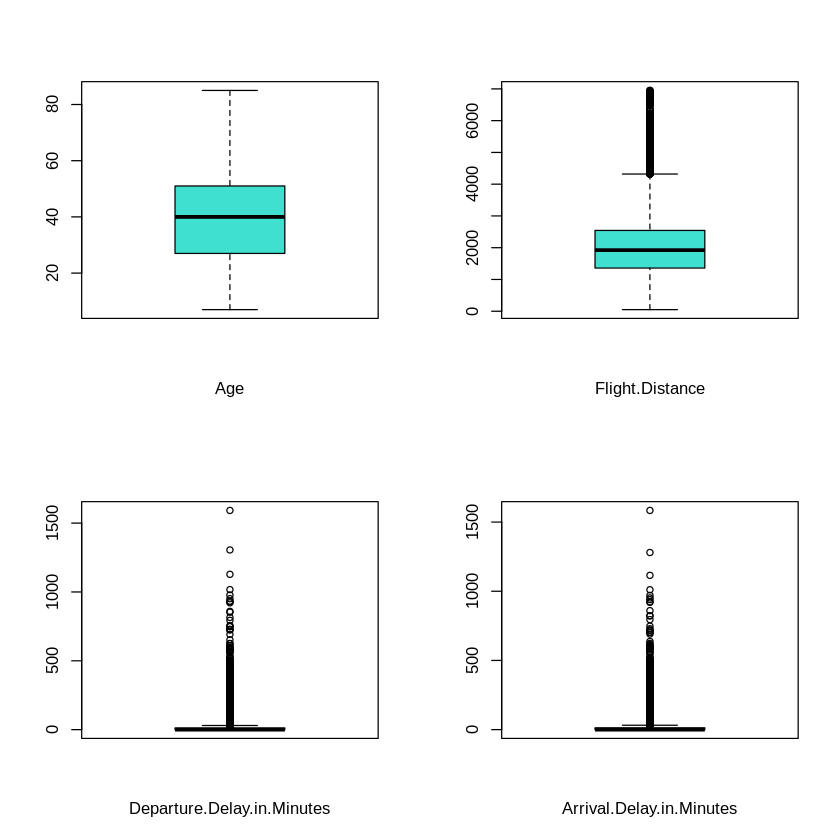

In [9]:
airlines_flight$Departure.Delay.in.Minutes=as.numeric(airlines_flight$Departure.Delay.in.Minutes)

#Boxplots for strictly numerical variables
par(mfrow=c(2,2))
boxplot(airlines_flight$Age,xlab="Age",col="turquoise")
summary(airlines_flight$Age)
sd(airlines_flight$Age)
boxplot(airlines_flight$Flight.Distance,xlab="Flight.Distance",col="turquoise")
summary(airlines_flight$Flight.Distance)
sd(airlines_flight$Flight.Distance)
boxplot(airlines_flight$Departure.Delay.in.Minutes,xlab="Departure.Delay.in.Minutes",col="turquoise")
summary(airlines_flight$Departure.Delay.in.Minutes)
sd(airlines_flight$Departure.Delay.in.Minutes)
boxplot(airlines_flight$Arrival.Delay.in.Minutes,xlab="Arrival.Delay.in.Minutes",col="turquoise")
summary(airlines_flight$Arrival.Delay.in.Minutes)
sd(airlines_flight$Arrival.Delay.in.Minutes)

The code and accompanying plots serve as a pivotal tool for offering a detailed statistical and visual overview of crucial numerical variables within the airlines_flight dataset. Through the analysis of boxplots, summary statistics, and standard deviations, a deeper understanding of the data's distribution, central tendency, variability, and the presence of potential outliers is achieved. This examination is particularly valuable for exploring the nuances of flight ages, distances, and delays, revealing patterns that might not be immediately apparent. By leveraging these analytical tools, we can uncover insights that are essential for optimizing airline operations and enhancing customer satisfaction. Ultimately, this comprehensive analysis aids in making informed decisions and strategies in the aviation industry, highlighting the importance of data-driven approaches in understanding and improving flight services.

**Activity 4 -** In our study, the Forced Ranking Scale, a prevalent method for gauging individual preferences under specific conditions, was employed to measure the remaining numerical variables. This scale is instrumental in prioritizing options based on their relative importance or preference to an individual. To commence the descriptive analysis, the summary() function was initially utilized to provide a comprehensive overview of the data, followed by the calculation of standard deviation using the sd() command to assess the variability or dispersion of the data points.

For the purpose of graphical analysis, a critical transformation was applied to the variables, converting them into factors with the as.factor() command. This transformation is pivotal, as it ensures the accuracy of statistical analyses and the appropriateness of data visualization techniques. When variables are transformed into factors, R systematically assigns a numerical value to each level of the variable, facilitating subsequent analytical processes.

In terms of measurement scales, the analysis offered detailed insights, including the mean, median, standard deviation, and the distribution of each value within the variables. These statistical measures are essential for understanding the central tendency, dispersion, and overall distribution of the data, providing a solid foundation for in-depth analysis and interpretation. Through this meticulous approach, the study effectively captures and elucidates the nuances of individual preferences, leveraging both descriptive and graphical analyses to enrich the understanding of the data at hand.

In [10]:
# We will Selecting columns 8 to 21 for analysis
var.satisfaction <- airlines_flight[, 8:21]

# Convert service ratings to factors
service_variables <- c("Inflight.wifi.service", "Departure.Arrival.time.convenient",
                       "Ease.of.Online.booking", "Gate.location", "Food.and.drink",
                       "Online.boarding", "Seat.comfort", "Leg.room.service",
                       "Inflight.entertainment", "On.board.service",
                       "Checkin.service", "Cleanliness", "Baggage.handling",
                       "Online.support")

for (variable in service_variables) {
  var.satisfaction[[variable]] <- as.factor(var.satisfaction[[variable]])
  
  #  Let's add a level '0' for Baggage.handling.
  if (variable == "Baggage.handling") {
    levels(var.satisfaction[[variable]]) <- c(levels(var.satisfaction[[variable]]), "0")
    var.satisfaction[[variable]] <- factor(var.satisfaction[[variable]], levels = c("0", "1", "2", "3", "4", "5"))
  }
}

str(var.satisfaction)

'data.frame':	129487 obs. of  14 variables:
 $ Seat.comfort                     : Factor w/ 6 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Departure.Arrival.time.convenient: Factor w/ 6 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Food.and.drink                   : Factor w/ 6 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Gate.location                    : Factor w/ 6 levels "0","1","2","3",..: 3 4 4 4 4 4 4 4 4 4 ...
 $ Inflight.wifi.service            : Factor w/ 6 levels "0","1","2","3",..: 3 1 3 4 5 3 3 3 6 3 ...
 $ Inflight.entertainment           : Factor w/ 6 levels "0","1","2","3",..: 5 3 1 5 4 1 6 1 4 1 ...
 $ Online.support                   : Factor w/ 6 levels "0","1","2","3",..: 3 3 3 4 5 3 6 3 6 3 ...
 $ Ease.of.Online.booking           : Factor w/ 6 levels "0","1","2","3",..: 4 4 3 2 3 3 6 3 5 3 ...
 $ On.board.service                 : Factor w/ 6 levels "0","1","2","3",..: 4 5 4 2 3 6 6 4 5 3 ...
 $ Leg.room.service                 : Factor w/

**Activity 5 -** This task is centered on the detailed examination and visualization of the correlations among selected variables, specifically columns 8 to 21, within the airlines_flight dataset. By exploring the interconnections between these variables, the aim is to unravel the underlying patterns or dependencies that exist within the dataset, offering a clearer understanding of how these elements influence one another. Such an analysis is crucial for identifying potential relationships that could impact airline operations and passenger experience. Through the strategic use of statistical tools and visualization techniques, insights into the dataset's structure and dynamics are revealed, shedding light on areas that may benefit from further investigation or optimization. Ultimately, this activity not only enhances our comprehension of the dataset but also aids in the decision-making process by highlighting key variables that drive outcomes in the airline industry.

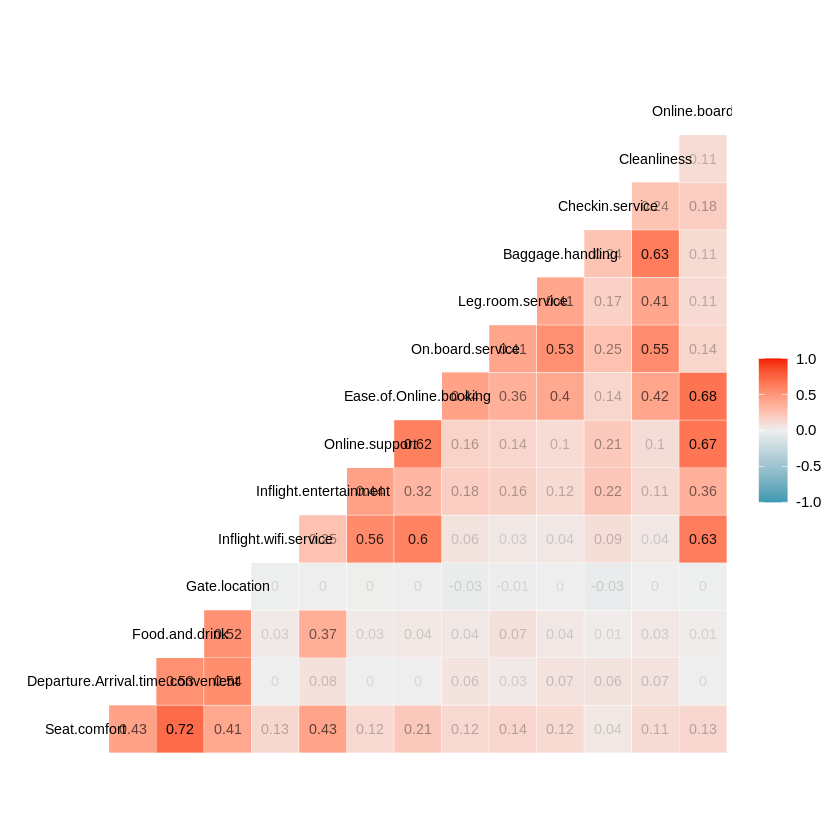

In [11]:
corr_plot <- ggcorr(airlines_flight[,8:21],
                    label = TRUE, 
                    label_size = 3, 
                    label_round = 2,
                    label_alpha = TRUE,
                    hjust = 0.5,
                    size = 3, 
                    layout.exp = 1)

# Plot the correlation plot created above.
corr_plot

This analytical endeavor employs the ggcorr function, a sophisticated tool designed for an in-depth exploration of correlations within a specific subset of the airlines_flight dataset. By generating a correlation plot, this function acts as a potent instrument for investigative analysis, facilitating the discovery of intricate patterns and relationships hidden within the data. Such a plot serves as a crucial foundation for identifying connections between variables, revealing insights that might not be immediately apparent. This visualization aids significantly in pinpointing potential areas that warrant further detailed study, thus enhancing the understanding of the dataset's structure and dynamics. Consequently, this activity not only enriches our comprehension of the data at hand but also opens up avenues for targeted research and decision-making based on the identified correlations.

**Activity 6 -** In our forthcoming analysis, we will delve into the airlines_flight dataset to examine and visualize the distribution of customer satisfaction, with a specific focus on variations by gender. This investigation aims to unravel the intricate relationship between customer satisfaction, serving as the dependent variable, and gender, which is considered an independent variable in this context. By scrutinizing this connection, we intend to gain valuable insights into the nuances of customer experience, shedding light on how satisfaction levels may differ across gender lines. Such insights could prove instrumental in guiding targeted enhancements to services or shaping bespoke marketing strategies that cater more effectively to diverse customer segments. Ultimately, this analysis not only promises to enrich our understanding of customer satisfaction dynamics within the airline industry but also holds the potential to drive more nuanced and effective customer engagement strategies.

,Female,Male,Sum
dissatisfied,22904,35701,58605
satisfied,42799,28083,70882
Sum,65703,63784,129487


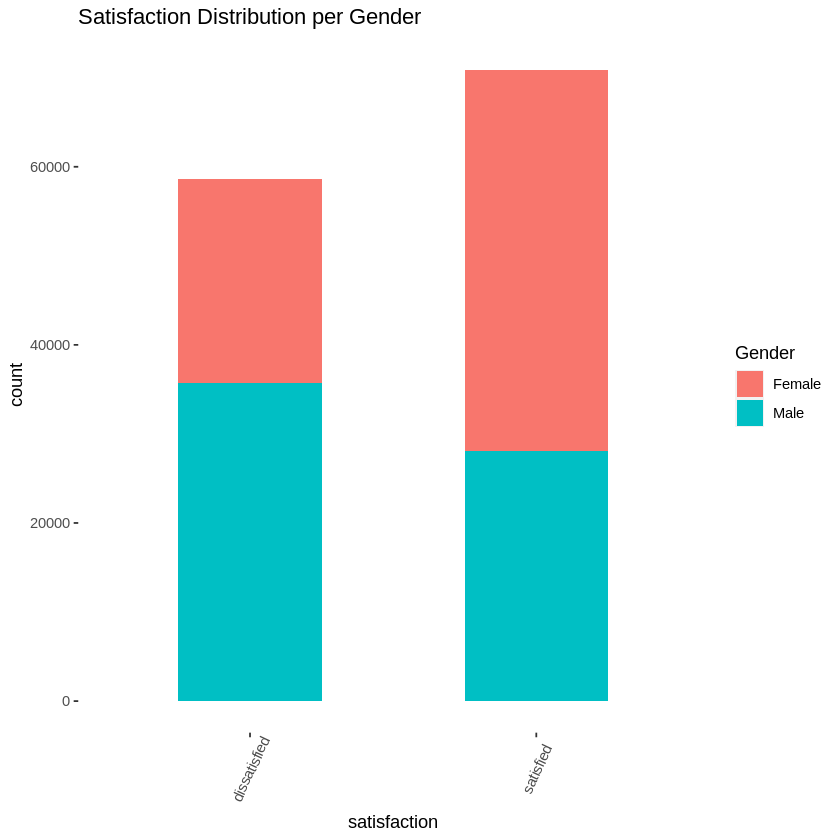

In [12]:
satisfaction<-ggplot(airlines_flight,aes(satisfaction))
satisfaction+geom_bar(aes(fill=Gender),width = 0.5) + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),axis.text.x = element_text(angle = 65,vjust = 0.6) ) + 
labs(title = "Satisfaction Distribution per Gender")
addmargins(table(airlines_flight$satisfaction,airlines_flight$Gender))

The analysis culminates in a bar chart that meticulously details the count of respondents according to their satisfaction levels, distinctly categorized by gender. This visual representation offers a clear insight into the distribution of satisfaction among different genders, highlighting potential disparities or trends. By differentiating satisfaction levels across genders, the chart serves as a critical tool for understanding how experiences might vary within the dataset's demographic. The findings gleaned from this visualization can inform more gender-responsive services or marketing strategies, aiming to address any identified gaps in satisfaction. Ultimately, this approach enhances our comprehension of customer satisfaction dynamics, paving the way for targeted improvements that could lead to a more inclusive and satisfying experience for all airline passengers.

**Activity 7 -** To explore the relationships among strictly numerical variables, we plan to employ the corrplot.mixed command from the "corrplot" package, generating a comprehensive correlation matrix. This matrix will serve as a visual tool, illustrating the strength and direction of correlations between pairs of variables, thus providing a clear overview of how these variables interact with each other. By leveraging this approach, we aim to uncover hidden patterns and insights within the data, enhancing our understanding of the underlying dynamics at play.

corrplot 0.84 loaded



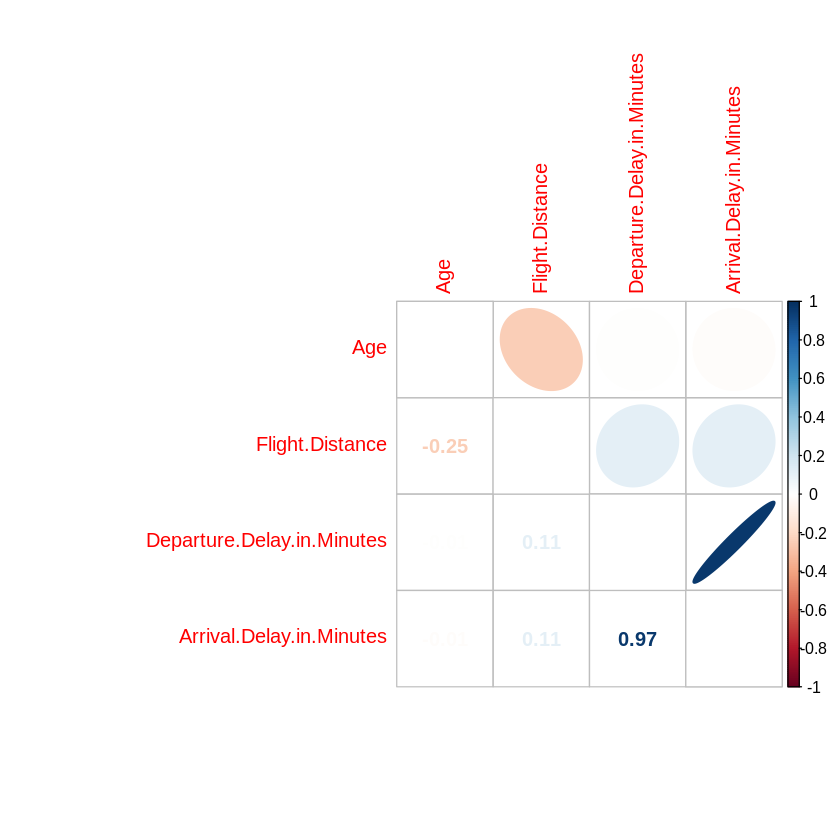

In [13]:
var.numeriche<-airlines_flight[,-1:-3]
var.numeriche<-var.numeriche[,-2,-3]
var.numeriche<-var.numeriche[,-2]
var.numeriche<-var.numeriche[,-3:-16]
library(corrplot)
corrplot.mixed(cor(var.numeriche,use = "complete.obs"),upper="ellipse",tl.pos = "lt")

The above chart elucidates two key correlations. Primarily, it reveals a strong linkage between Departure Delay (Departure.Delay.in.Minutes) and Arrival Delay (Arrival.Delay.in.Minutes), underscoring the tendency for flights that leave behind schedule to also arrive late. Secondly, it showcases an inverse correlation between Age and Flight Distance, indicating that the farther a customer ages, the shorter the flights they tend to embark on become. Additionally, there exists a slight positive correlation between Flight Distance and both Departure Delay (Departure.Delay.in.Minutes) and Arrival Delay (Arrival.Delay.in.Minutes), suggesting an increased likelihood of delays in departure and arrival with longer flight distances.

**Activity 8 -** To delve into the relationship between flight distance and age within the dataset named "var.numeriche," we plan to use the base R plot function to create a scatter plot that maps the logarithm of flight distance against the logarithm of age. This scatter plot will be further enriched by differentiating data points based on gender, as sourced from the "airlines_flight$Gender" variable, allowing for a nuanced analysis of how these variables interact across different genders. Through this visual representation, we aim to uncover insights into the dynamics of flight preferences and age distribution among passengers, providing a gender-specific perspective on travel behaviors.

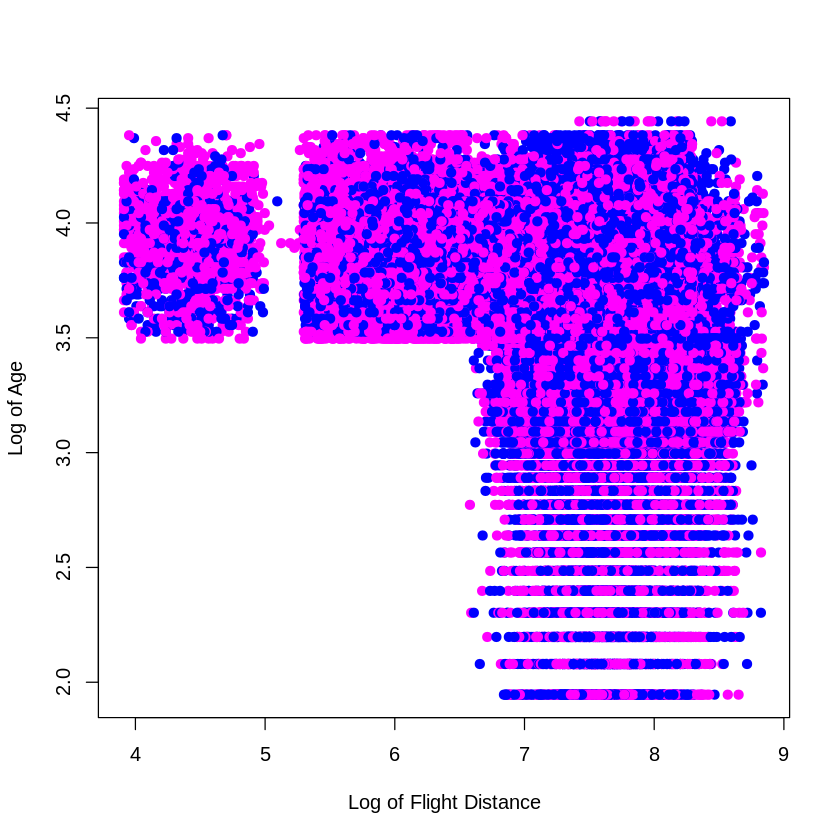

In [14]:
gender_colors <- ifelse(airlines_flight$Gender == "Male", "blue", "magenta")

plot(log(var.numeriche$Flight.Distance), log(var.numeriche$Age), 
     pch=19, col=gender_colors, 
     xlab="Log of Flight Distance", ylab="Log of Age")

The graphical analysis using the logarithms of the Age and Flight.Distance variables from our dataset illuminates intriguing patterns, as delineated by the correlation matrix. This graph distinctively reveals a demographic divide: younger customers predominantly embark on medium to long-haul journeys, highlighting a preference or necessity that skews towards longer distances. In contrast, the older customer segment demonstrates a more varied range of travel distances, utilizing the airline's services for both short and extensive routes alike. The specific correlation coefficient of -0.25 between Age and Flight.Distance substantiates this observation, indicating a slight inverse relationship where, despite a general tendency for all age groups to prefer longer flights, older passengers are also found traveling shorter distances.

To delve deeper into how various factors within the dataset influence customer satisfaction, logistic regression was employed as the analytical tool of choice. This statistical method is particularly adept at modeling the relationship between a binary dependent variable, such as customer satisfaction (coded as 0 or 1), and multiple independent variables. By applying logistic regression, we aim to quantify the impact of different variables on the likelihood of a customer being satisfied with the airline's services. This approach allows for a nuanced understanding of the determinants of satisfaction, shedding light on what aspects of the service or demographic factors contribute most significantly to positive customer experiences.

Such insights are invaluable, offering a foundation upon which strategic improvements can be built to enhance overall satisfaction. Identifying specific variables that have a notable influence on satisfaction enables targeted interventions, potentially leading to enhanced service quality and better alignment with customer expectations. Ultimately, through this comprehensive analysis, we not only gain a deeper understanding of our customers' travel behaviors and preferences but also equip ourselves with the knowledge to tailor our services more effectively to meet their needs.

**Activity 9 -** Initially, it's crucial to verify that all categorical variables in our dataset are accurately coded as factors, a step that lays the groundwork for precise statistical analysis. This process ensures that these variables are recognized and treated appropriately within the analytical framework, allowing for meaningful interpretation and analysis. By meticulously coding categorical variables as factors, we optimize the dataset for subsequent analyses, paving the way for insights that are both accurate and actionable.

In [15]:
airlines_flight$Gender <- as.factor(airlines_flight$Gender)
airlines_flight$Customer.Type <- as.factor(airlines_flight$Customer.Type)
airlines_flight$Type.of.Travel <- as.factor(airlines_flight$Type.of.Travel)
airlines_flight$Class <- as.factor(airlines_flight$Class)

**Activity 10 -** Following the preparation of categorical variables, the next step involves executing the regression model. Given that satisfaction is inherently categorical but needs to be analyzed as a numerical variable, it will be converted into a binary numerical variable, adopting values of 0 and 1, to facilitate this analysis. Alternatively, employing logistic regression could effectively model satisfaction as a binary outcome, offering a suitable approach for understanding the influence of predictors on customer satisfaction.

In [16]:
airlines_flight$satisfaction <- ifelse(airlines_flight$satisfaction == "satisfied", 1, 0)

**Activity 11 -** In the process of constructing our logistic regression model, the decision to include only 13 variables was informed by the insights garnered from the correlation plot created during ***Activity 5***, alongside the dependent variable. This strategic selection of variables aims to streamline the model, focusing on those factors most likely to impact the outcome. Subsequently, a logistic regression model, referred to here as ***"model,"*** was developed to facilitate the analysis of these chosen variables against the dependent variable "satisfaction." This model serves as a pivotal tool, enabling the visualization and interpretation of the regression results, thereby shedding light on the relationship between customer satisfaction and the selected predictors. The graphical representation of this model stands as a testament to the analytical rigor applied, offering a clear depiction of the underlying dynamics at play in determining customer satisfaction.

In [17]:
model <- lm(satisfaction ~ Gender + Customer.Type + Type.of.Travel + Class + Seat.comfort + 
            Departure.Arrival.time.convenient + Food.and.drink + Inflight.entertainment + Ease.of.Online.booking + 
            On.board.service + Leg.room.service + Checkin.service, data = airlines_flight)

In [18]:
summary(model)


Call:
lm(formula = satisfaction ~ Gender + Customer.Type + Type.of.Travel + 
    Class + Seat.comfort + Departure.Arrival.time.convenient + 
    Food.and.drink + Inflight.entertainment + Ease.of.Online.booking + 
    On.board.service + Leg.room.service + Checkin.service, data = airlines_flight)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.20039 -0.24708  0.00796  0.22567  1.55829 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -0.4834876  0.0056856  -85.04   <2e-16 ***
GenderMale                        -0.1414417  0.0020403  -69.33   <2e-16 ***
Customer.TypeLoyal Customer        0.2743733  0.0030429   90.17   <2e-16 ***
Type.of.TravelPersonal Travel     -0.0937785  0.0029923  -31.34   <2e-16 ***
ClassEco                          -0.1109679  0.0027925  -39.74   <2e-16 ***
ClassEco Plus                     -0.1201507  0.0042855  -28.04   <2e-16 ***
Seat.comfort                       0.0505980 

The results of our analysis provide an opportunity to scrutinize the estimated coefficients assigned to each variable, shedding light on the specific ways these factors influence the dependent variable. These coefficients offer critical insights into both the direction and magnitude of each variable's effect, thus serving as a quantifiable index of their impact. By delving into these details, we enhance our comprehension of the roles these variables play and their importance within the model. Such an in-depth examination is crucial for appreciating the significance of each factor in relation to the model's overall predictive capability. Ultimately, this analytical process is key to understanding the contributions of individual variables to the model, enabling us to refine its accuracy and effectiveness in prediction.

**Activity 12 -** To analyze how customer satisfaction varies by gender, we will begin by plotting this relationship. Prior to this, it's essential to transform the satisfaction column in the airlines_flight dataset into a factor, assigning specific levels and labels to accurately represent the data. This preparatory step ensures that our analysis is both meaningful and precise, laying the foundation for insightful observations regarding the impact of gender on customer satisfaction.

In [19]:
airlines_flight$satisfaction <- factor(airlines_flight$satisfaction, levels = c(0, 1), labels = c("Dissatisfied", "Satisfied"))

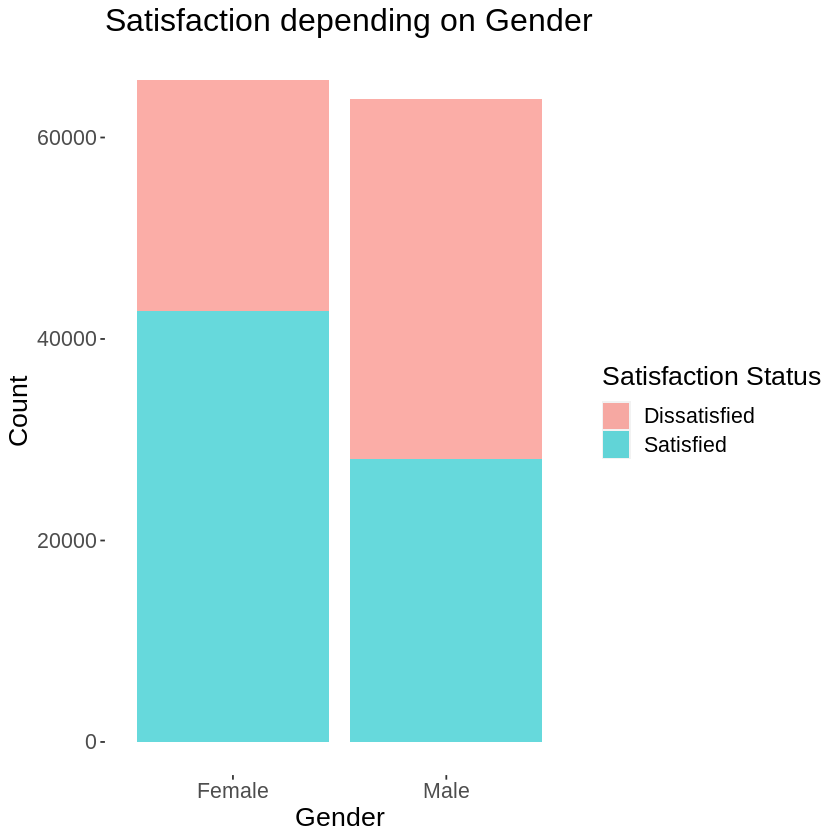

In [20]:
ggplot(airlines_flight, aes(x=Gender, fill = satisfaction)) +
  geom_bar(alpha=0.6) +
  scale_fill_discrete(name = "Satisfaction Status", labels=c("Dissatisfied", "Satisfied")) +
  labs(x="Gender", y="Count", title="Satisfaction depending on Gender") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="right", text= element_text(size=16))

The bar chart presented offers a comparative analysis of the number of satisfied versus dissatisfied customers, segmented by gender within the dataset. This visual tool effectively uncovers potential disparities in satisfaction levels across genders, shedding light on underlying customer satisfaction dynamics. Such insights gleaned from the chart are instrumental for identifying trends and nuances in customer experiences, which can significantly inform strategic decisions aimed at enhancing service quality or developing targeted marketing campaigns. By dissecting customer satisfaction through the lens of gender, the chart facilitates a deeper understanding of customer preferences and expectations, providing a solid foundation for tailored service improvements. Ultimately, this analysis not only aids in optimizing customer satisfaction but also in refining business strategies to better meet the diverse needs of the customer base.

**Activity 13 -** In our upcoming analysis, we will delve into the dataset to statistically examine the relationship between two key categorical variables: Gender and satisfaction. This focused investigation aims to uncover any significant associations or patterns that exist between these variables, shedding light on how gender might influence levels of satisfaction. Through this analytical approach, we seek to gain insights that could inform targeted improvements in service delivery or customer engagement strategies.

In [21]:
# Contingency table of counts
table(airlines_flight$Gender, airlines_flight$satisfaction)

prop.table(table(airlines_flight$Gender, airlines_flight$satisfaction))

prop.table(table(airlines_flight$Gender, airlines_flight$satisfaction), 1)

logistic_model_gender <- glm(satisfaction ~ Gender, data = airlines_flight, family = binomial())

summary(logistic_model_gender)


        
         Dissatisfied Satisfied
  Female        22904     42799
  Male          35701     28083

        
         Dissatisfied Satisfied
  Female    0.1768826 0.3305274
  Male      0.2757111 0.2168789

        
         Dissatisfied Satisfied
  Female    0.3485990 0.6514010
  Male      0.5597172 0.4402828


Call:
glm(formula = satisfaction ~ Gender, family = binomial(), data = airlines_flight)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4518  -1.0773   0.9259   0.9259   1.2809  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.625203   0.008187   76.37   <2e-16 ***
GenderMale  -0.865217   0.011430  -75.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 178341  on 129486  degrees of freedom
Residual deviance: 172475  on 129485  degrees of freedom
AIC: 172479

Number of Fisher Scoring iterations: 4


In the analysis conducted using the logistic regression model, the variable 'Gender' emerged as a significant predictor of customer satisfaction within the dataset. The findings revealed that female customers are statistically more inclined to report satisfaction than their male counterparts, as evidenced by the model's results. Specifically, the model generated a negative coefficient for male customers, indicating a lower probability of satisfaction among men when compared to women. This distinction suggests that gender plays a crucial role in determining the levels of satisfaction experienced by customers, with females displaying a higher propensity for positive evaluations.

The implications of these findings are manifold, suggesting that service perceptions and experiences might differ significantly between genders. Understanding this dynamic is vital for businesses aiming to tailor their services to better meet the diverse needs and expectations of their customer base. For instance, the insights could inform targeted marketing strategies or service design adjustments that specifically address the factors contributing to the satisfaction gap between male and female customers.

Moreover, this analysis underscores the importance of segmenting customer feedback and experiences by demographic characteristics, such as gender, to unearth nuanced insights into customer satisfaction drivers. By doing so, companies can develop more effective and inclusive strategies that enhance customer experiences across all segments. Ultimately, recognizing and addressing the varied satisfaction levels between genders not only aids in improving overall customer satisfaction but also contributes to building stronger, more loyal customer relationships.

**Activity 14 -** To advance our statistical analysis of the dataset, we will construct a contingency table that cross-tabulates customer type with satisfaction levels, focusing on elucidating the relationship between these two categorical variables. This table will serve as a foundational tool, enabling us to systematically examine the interplay between different types of customers and their reported satisfaction, thereby offering insights into patterns or trends that may exist within the data. Through this analysis, we aim to identify whether the nature of a customer's relationship with the airline—be it occasional or frequent flyer—has a discernible impact on their satisfaction. Such insights are crucial for tailoring service offerings and enhancing customer experience, as understanding these dynamics can inform strategic decisions and operational improvements. Ultimately, this methodical approach to analyzing customer type and satisfaction paves the way for more targeted and effective customer engagement strategies, potentially leading to increased loyalty and satisfaction across customer segments.

In [22]:
customer_satisfaction_table <- table(airlines_flight$Customer.Type, airlines_flight$satisfaction)

customer_satisfaction_df <- as.data.frame(customer_satisfaction_table)

names(customer_satisfaction_df) <- c("CustomerType", "Satisfaction", "Count")

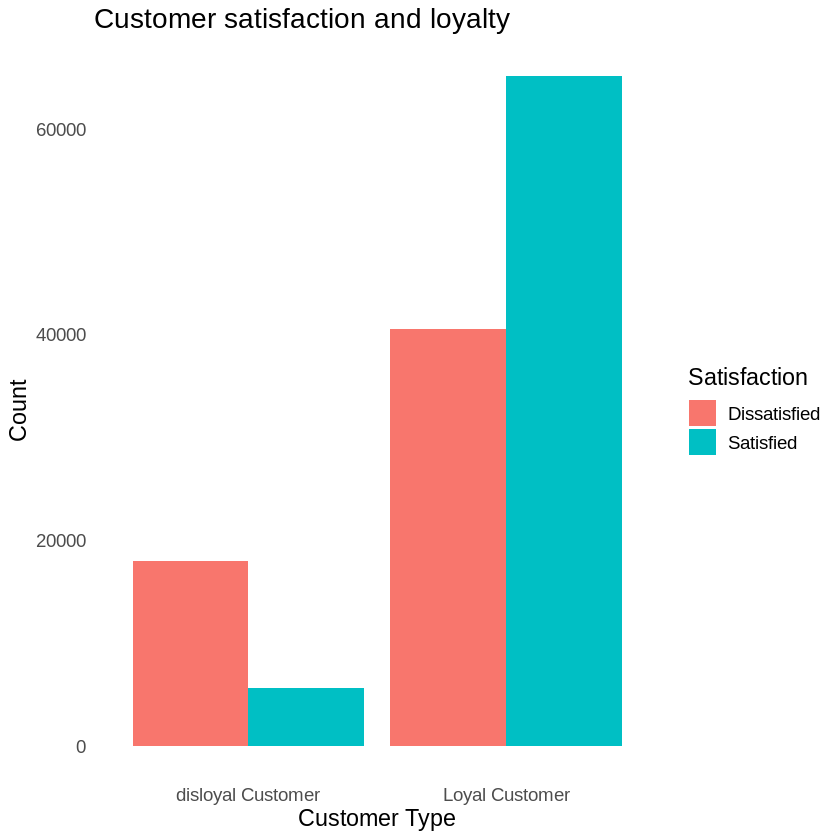

In [23]:
ggplot(customer_satisfaction_df, aes(x=CustomerType, y=Count, fill=Satisfaction)) +
  geom_bar(stat="identity", position=position_dodge()) +
  labs(x="Customer Type", y="Count", title="Customer satisfaction and loyalty") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),text=element_text(size=14), legend.position="right")

In [24]:
customer_satisfaction_table <- table(airlines_flight$Customer.Type, airlines_flight$satisfaction)
customer_satisfaction_table

prop_customer_satisfaction <- prop.table(customer_satisfaction_table)
prop_customer_satisfaction

prop.table(customer_satisfaction_table, 1)

logistic_model_customer <- glm(satisfaction ~ Customer.Type, data = airlines_flight, family = binomial())

summary(logistic_model_customer)

                   
                    Dissatisfied Satisfied
  disloyal Customer        18026      5688
  Loyal Customer           40579     65194

                   
                    Dissatisfied  Satisfied
  disloyal Customer   0.13921089 0.04392719
  Loyal Customer      0.31338281 0.50347911

                   
                    Dissatisfied Satisfied
  disloyal Customer    0.7601417 0.2398583
  Loyal Customer       0.3836423 0.6163577


Call:
glm(formula = satisfaction ~ Customer.Type, family = binomial(), 
    data = airlines_flight)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3842  -1.3842   0.9838   0.9838   1.6898  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -1.15346    0.01521  -75.84   <2e-16 ***
Customer.TypeLoyal Customer  1.62757    0.01647   98.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 178341  on 129486  degrees of freedom
Residual deviance: 166980  on 129485  degrees of freedom
AIC: 166984

Number of Fisher Scoring iterations: 4


The graph, aptly named "Customer satisfaction and loyalty," vividly demonstrates that customers identified as loyal exhibit significantly higher satisfaction rates compared to their non-loyal counterparts. This observation is quantitatively backed by a positive loyalty coefficient obtained from logistic regression analysis, which underscores a direct and positive correlation between the degree of customer loyalty and the likelihood of satisfaction. Such findings illuminate the fact that customers recognized for their loyalty are predisposed to experiencing higher levels of satisfaction. Moreover, the positive coefficient associated with the "Customer.Type" variable, which denotes loyalty status, further reinforces the idea that loyalty enhances satisfaction probabilities. Consequently, it becomes evident that loyalty status acts as a crucial predictor of customer satisfaction, highlighting its importance in the dynamics of customer experience. By acknowledging the value of customer loyalty, businesses can tailor strategies to not only cultivate but also leverage this loyalty for mutual benefit. Ultimately, this analysis underscores the pivotal role of loyalty in shaping customer satisfaction, offering strategic insights for fostering enduring customer relationships.

**Activity 15 -** We're now going to visualize the distribution of satisfaction levels (satisfaction) across different types of travel (Type.of.Travel) in the airlines_flight dataset.

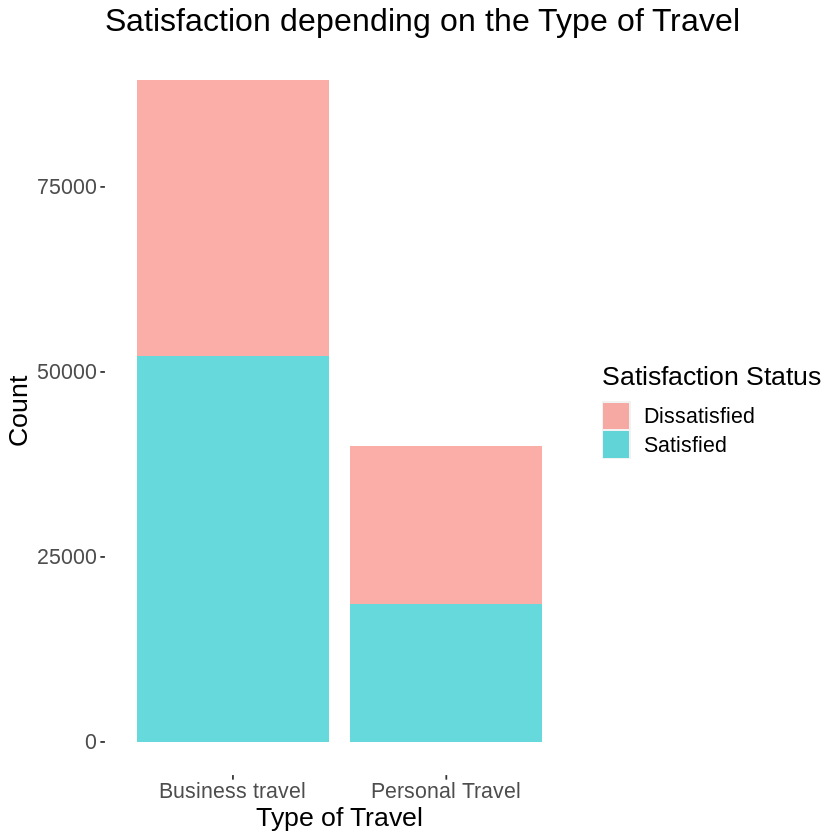

In [25]:
# Adjusting the dataset name to 'airlines_flight' and correcting the axis label
ggplot(airlines_flight, aes(x=`Type.of.Travel`, fill=satisfaction)) +
  geom_bar(alpha=0.6) +
  scale_fill_discrete(name="Satisfaction Status", labels=c("Dissatisfied", "Satisfied")) +
  labs(x="Type of Travel", y="Count", title="Satisfaction depending on the Type of Travel") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="right", text=element_text(size=16))

In [26]:
type_travel_satisfaction_table <- table(airlines_flight$`Type.of.Travel`, airlines_flight$satisfaction)
type_travel_satisfaction_table

prop_table_overall <- prop.table(type_travel_satisfaction_table)
prop_table_overall

prop_table_rowwise <- prop.table(type_travel_satisfaction_table, 1)
prop_table_rowwise

airlines_flight$`Type.of.Travel` <- as.factor(airlines_flight$`Type.of.Travel`)

logistic_model <- glm(satisfaction ~ `Type.of.Travel`, data=airlines_flight, family=binomial)
summary(logistic_model)

                 
                  Dissatisfied Satisfied
  Business travel        37238     52207
  Personal Travel        21367     18675

                 
                  Dissatisfied Satisfied
  Business travel    0.2875810 0.4031833
  Personal Travel    0.1650127 0.1442230

                 
                  Dissatisfied Satisfied
  Business travel    0.4163229 0.5836771
  Personal Travel    0.5336147 0.4663853


Call:
glm(formula = satisfaction ~ Type.of.Travel, family = binomial, 
    data = airlines_flight)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.324  -1.324   1.038   1.038   1.235  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    0.337887   0.006783   49.81   <2e-16 ***
Type.of.TravelPersonal Travel -0.472549   0.012098  -39.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 178341  on 129486  degrees of freedom
Residual deviance: 176809  on 129485  degrees of freedom
AIC: 176813

Number of Fisher Scoring iterations: 4


The bar chart, named "Satisfaction depending on the type of travel," clearly depicts a notable disparity in satisfaction levels, with business travelers demonstrating a higher degree of satisfaction than those traveling for personal reasons. This pattern is statistically supported by logistic regression analysis, wherein the coefficient for the variable labeled "Personal Travel" emerges as negative. Such a negative coefficient suggests that, after adjusting for various other factors, individuals traveling for personal reasons tend to exhibit lower satisfaction levels in comparison to business travelers. This distinction is crucial for understanding the diverse expectations and experiences of different traveler categories within the dataset. It hints at the possibility that business travelers might have different priorities or receive different levels of service, influencing their satisfaction positively. Conversely, the lessened likelihood of satisfaction among personal travelers calls attention to potential areas for improvement in catering to this segment's needs. Recognizing and addressing the distinct factors that contribute to these satisfaction disparities can guide airlines in refining their services, aiming for enhanced customer satisfaction across all travel purposes.

**Activity 16 -** Produce a bar chart that compares the levels of customer satisfaction across different flight classes, providing insights into how flight class might influence overall satisfaction. This visualization can help identify trends, preferences, or areas that may require improvements, based on the distribution of satisfied versus dissatisfied customers across classes.

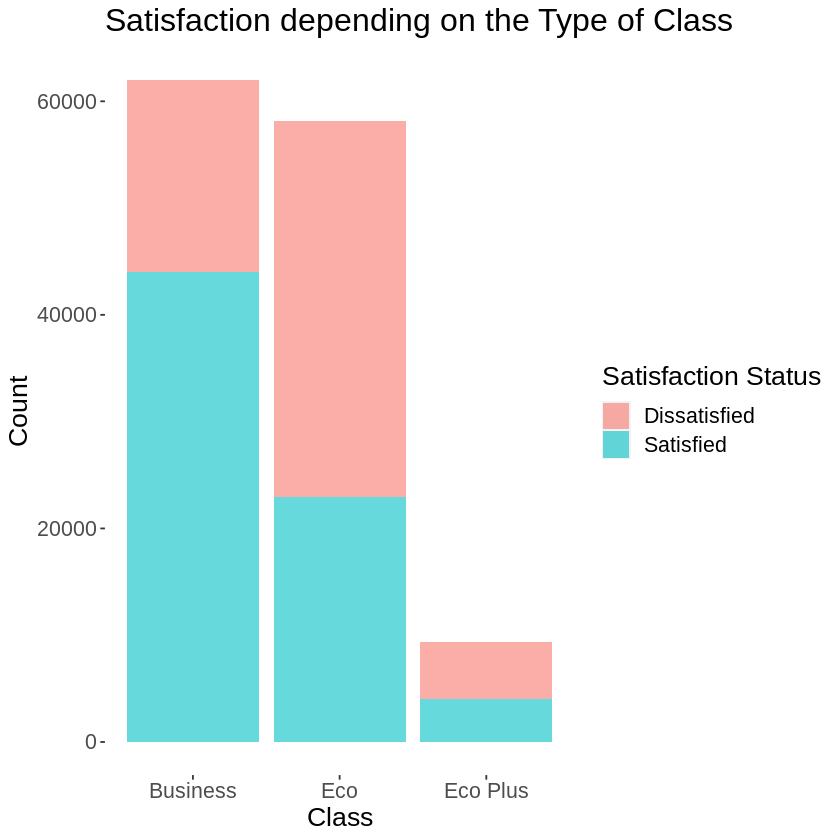

In [27]:
ggplot(airlines_flight, aes(x=Class, fill=satisfaction)) +
  geom_bar(alpha=0.6) +
  scale_fill_discrete(name="Satisfaction Status", labels=c("Dissatisfied", "Satisfied")) +
  labs(x="Class", y="Count", title="Satisfaction depending on the Type of Class") +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="right", text=element_text(size=16))

In [28]:
class_satisfaction_table <- table(airlines_flight$Class, airlines_flight$satisfaction)
class_satisfaction_table

prop_table_overall <- prop.table(class_satisfaction_table)
prop_table_overall

prop_table_rowwise <- prop.table(class_satisfaction_table, 1)
prop_table_rowwise

logistic_model_class <- glm(satisfaction ~ Class, data = airlines_flight, family = binomial())

summary(logistic_model_class)

          
           Dissatisfied Satisfied
  Business        18013     43977
  Eco             35219     22898
  Eco Plus         5373      4007

          
           Dissatisfied  Satisfied
  Business   0.13911049 0.33962483
  Eco        0.27198869 0.17683628
  Eco Plus   0.04149451 0.03094519

          
           Dissatisfied Satisfied
  Business    0.2905791 0.7094209
  Eco         0.6060017 0.3939983
  Eco Plus    0.5728145 0.4271855


Call:
glm(formula = satisfaction ~ Class, family = binomial(), data = airlines_flight)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5722  -1.0009   0.8286   0.8286   1.3648  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    0.892573   0.008846  100.90   <2e-16 ***
ClassEco      -1.323109   0.012261 -107.92   <2e-16 ***
ClassEco Plus -1.185917   0.022670  -52.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 178341  on 129486  degrees of freedom
Residual deviance: 165458  on 129484  degrees of freedom
AIC: 165464

Number of Fisher Scoring iterations: 4


The "Satisfaction depending on the type of Class" graph elucidates the pivotal role of the travel class in influencing airline customer satisfaction. The logistic regression analysis further substantiates this observation, revealing that customers who opt for Business class exhibit a significantly higher level of satisfaction compared to those in EcoPlus and Economy classes. This discrepancy is quantitatively supported by the negative coefficients associated with EcoPlus and Economy classes, indicating these passengers are less likely to be satisfied relative to their Business class counterparts. Such findings underscore the importance of service quality and amenities associated with different classes of travel in shaping customer satisfaction.

Moreover, the logistic regression sheds light on the estimated coefficients of various variables, including customer ratings, which serve as crucial indicators of satisfaction levels. These coefficients offer a nuanced understanding of how different aspects of the airline service impact customer perceptions and satisfaction. The negative coefficients for EcoPlus and Economy suggest that enhancements in these classes could potentially elevate satisfaction levels, bringing them closer to the standards expected in Business class.

The analysis not only highlights the disparity in satisfaction across different travel classes but also points towards the significance of continuously improving service offerings, particularly in lower-tier classes. By addressing the factors that contribute to lower satisfaction in EcoPlus and Economy classes, airlines have the opportunity to improve overall customer satisfaction. Ultimately, this comprehensive analysis offers strategic insights for airlines aiming to optimize their service offerings and enhance the travel experience for passengers across all classes, thereby fostering loyalty and satisfaction among a broader customer base.

**Activity 17 -** What almost all the variables in the model have in common, as can be seen from the graphs below, is that as the ratings given by customers for the various services offered by the airline increase, the number of satisfied customers increases, thereby reducing or eliminating the number of dissatisfied customers.

In [29]:
cust.satisfaction <- airlines_flight[-2:-7] 
cust.satisfaction <- cust.satisfaction[-5]
cust.satisfaction <- cust.satisfaction[-5]
cust.satisfaction <- cust.satisfaction[-10]
cust.satisfaction <- cust.satisfaction[-11:-14]
cust.satisfaction <- cust.satisfaction[-6]

In [30]:
cust.satisfaction$Seat.comfort <- factor(cust.satisfaction$Seat.comfort, ordered = TRUE)
cust.satisfaction$Departure.Arrival.time.convenient <- factor(cust.satisfaction$Departure.Arrival.time.convenient, ordered = TRUE)
cust.satisfaction$Food.and.drink <- factor(cust.satisfaction$Food.and.drink, ordered = TRUE)
cust.satisfaction$Inflight.entertainment <- factor(cust.satisfaction$Inflight.entertainment, ordered = TRUE)
cust.satisfaction$Ease.of.Online.booking <- factor(cust.satisfaction$Ease.of.Online.booking, ordered = TRUE)
cust.satisfaction$On.board.service <- factor(cust.satisfaction$On.board.service, ordered = TRUE)
cust.satisfaction$Checkin.service <- factor(cust.satisfaction$Checkin.service, ordered = TRUE)
cust.satisfaction$Leg.room.service <- factor(cust.satisfaction$Leg.room.service, ordered = TRUE)


   
    Dissatisfied Satisfied
  0        0.000     0.037
  1        0.089     0.073
  2        0.142     0.079
  3        0.145     0.080
  4        0.076     0.143
  5        0.001     0.136

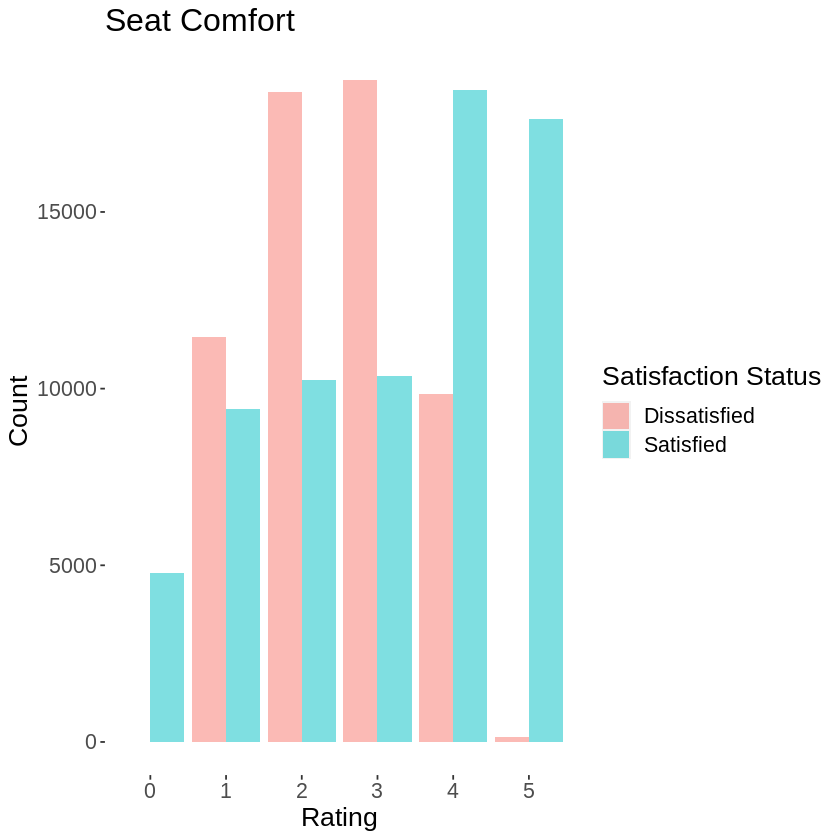

In [31]:
ggplot(cust.satisfaction, aes(x=`Seat.comfort`, fill =`satisfaction`))+geom_bar(position="dodge", alpha=0.5)+
labs(x="Rating", y="Count", title="Seat Comfort")+scale_fill_discrete(name = "Satisfaction Status", labels=c("Dissatisfied", "Satisfied"))+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="right", text= element_text( size = 16))
round(prop.table(table(cust.satisfaction$Seat.comfort, cust.satisfaction$satisfaction)),3)

The analysis of the variable Seat.comfort reveals a distinctive pattern in customer dissatisfaction based on seat comfort ratings, showing an exponential increase in dissatisfaction up to a rating of 3. Starting from no dissatisfaction at a rating of 0, the dissatisfaction rate escalates to 8.9% at rating 1, climbs to 14.2% at rating 2, and peaks at 14.5% at rating 3, before it begins to decline, reaching 7.6% at rating 4 and dropping significantly to 0.1% at rating 5. Conversely, satisfaction levels exhibit a steady growth up to rating 3, with satisfaction percentages rising from 3.7% at rating 0 to 8% at rating 3, followed by a sharp increase to 14.3% at rating 4 and slightly dipping to 13.6% at rating 5. This trend indicates that customer satisfaction with seat comfort significantly improves at higher ratings, reflecting a direct relationship between seat comfort and customer satisfaction. The observed pattern in satisfaction and dissatisfaction rates across different ratings underpins the positive coefficient estimated by the logistic regression, highlighting seat comfort as a critical factor in determining overall customer satisfaction.

   
    Dissatisfied Satisfied
  0        0.023     0.028
  1        0.066     0.094
  2        0.081     0.095
  3        0.082     0.096
  4        0.108     0.120
  5        0.092     0.115

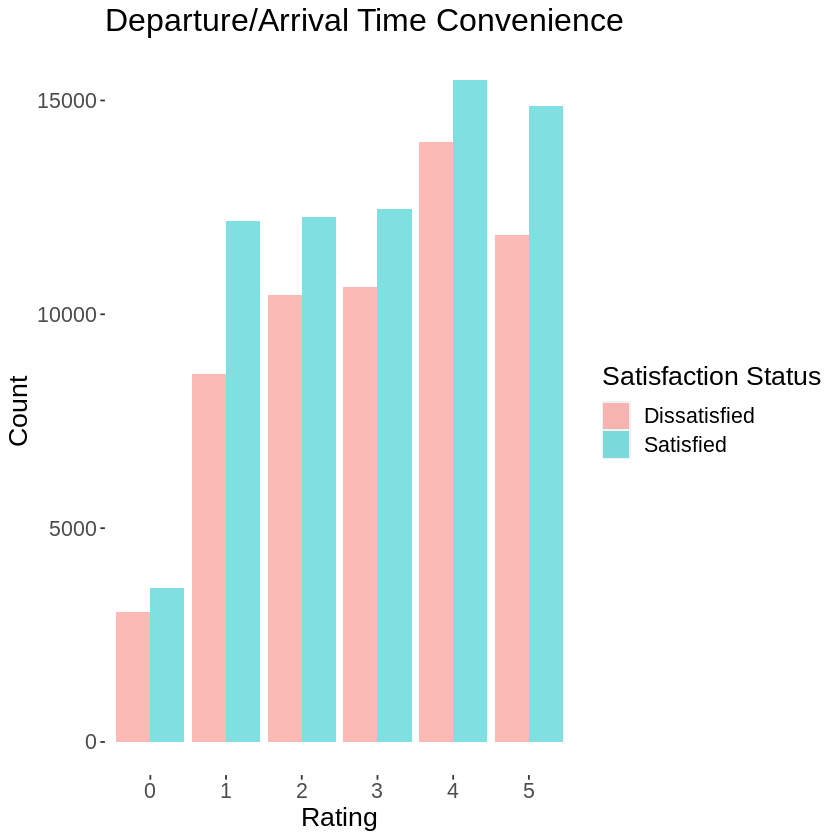

In [32]:
ggplot(cust.satisfaction, aes(x=`Departure.Arrival.time.convenient`, fill=`satisfaction`)) +
  geom_bar(position="dodge", alpha=0.5) +
  labs(x="Rating", y="Count", title="Departure/Arrival Time Convenience") +
  scale_fill_discrete(name="Satisfaction Status", labels=c("Dissatisfied", "Satisfied")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="right", text=element_text(size=16))
round(prop.table(table(cust.satisfaction$Departure.Arrival.time.convenient, cust.satisfaction$satisfaction)),3)

The analysis of the variable Departure.Arrival.time.convenient reveals a unique trend in customer dissatisfaction and satisfaction levels based on scoring. Dissatisfaction with the convenience of departure and arrival times experiences a steady increase from a score of 0 to 4, where dissatisfaction rates escalate from 2.3% to 10.8%, before witnessing a slight decline at score 5 to 9.2%, marking an exception in the pattern when compared to other variables studied. Conversely, satisfaction levels mirror the progressive increase observed in the previously discussed variable, starting from 2.8% at score 0 and climbing to 12% by score 4, then marginally reducing to 11.5% at score 5. This pattern suggests that while most customers' dissatisfaction grows with mid-range scores, a slight improvement in satisfaction is observed at the highest score. The unique behavior of the Departure.Arrival.time.convenient variable indicates its distinct impact on customer satisfaction, deviating from the trends seen in other service aspects.

   
    Dissatisfied Satisfied
  0        0.010     0.036
  1        0.080     0.082
  2        0.119     0.090
  3        0.124     0.093
  4        0.086     0.124
  5        0.034     0.122

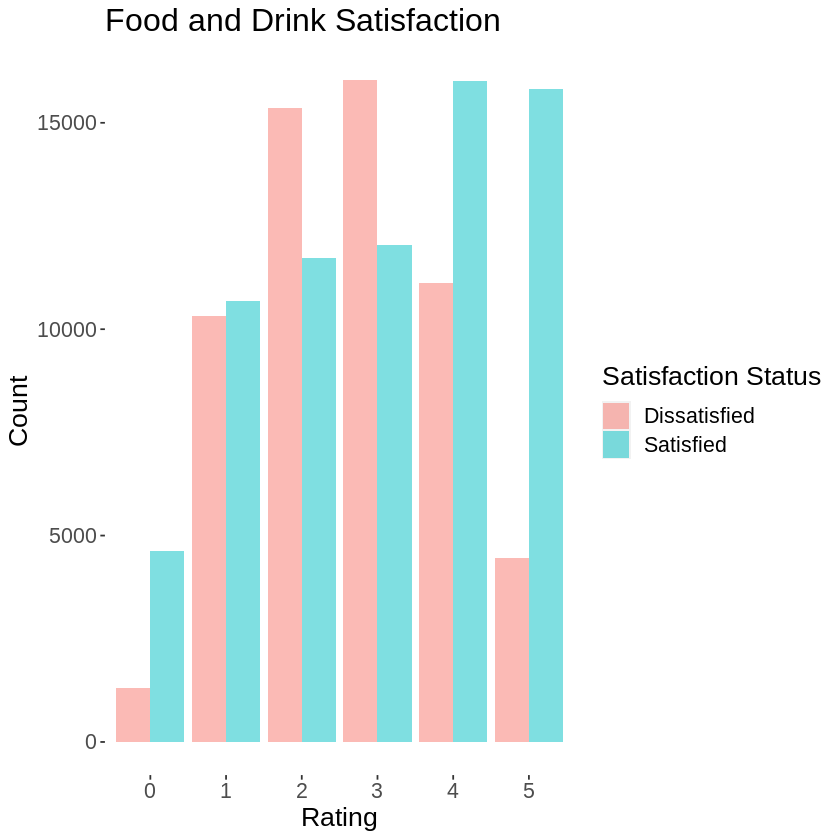

In [33]:
ggplot(cust.satisfaction, aes(x=Food.and.drink, fill=satisfaction)) +
  geom_bar(position="dodge", alpha=0.5) +
  labs(x="Rating", y="Count", title="Food and Drink Satisfaction") +
  scale_fill_discrete(name="Satisfaction Status", labels=c("Dissatisfied", "Satisfied")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="right", text=element_text(size=16))

round(prop.table(table(cust.satisfaction$Food.and.drink, cust.satisfaction$satisfaction)),3)

The variable Food.and.drink exhibits a trend in customer satisfaction and dissatisfaction that closely mirrors the pattern observed with the Seat.comfort variable. Dissatisfaction with food and drink options peaks at a score of 3, where 12.4% of customers express discontent, but then this dissatisfaction notably declines with higher scores, dropping to 3.4% at the top score of 5. On the satisfaction front, there is a steady increase in positive feedback, culminating in 12.4% of customers reporting satisfaction at score 4, with a slight decrease to 12.2% at score 5. This trend indicates that while a significant portion of customers are initially dissatisfied with food and drink quality at mid-range scores, improvements in these areas can lead to enhanced satisfaction at higher scores. The patterns observed with Food.and.drink emphasize the critical role of in-flight catering in overall passenger satisfaction, underscoring the importance of quality enhancements in airline services.

   
    Dissatisfied Satisfied
  0        0.008     0.015
  1        0.072     0.019
  2        0.122     0.025
  3        0.149     0.037
  4        0.090     0.232
  5        0.011     0.219

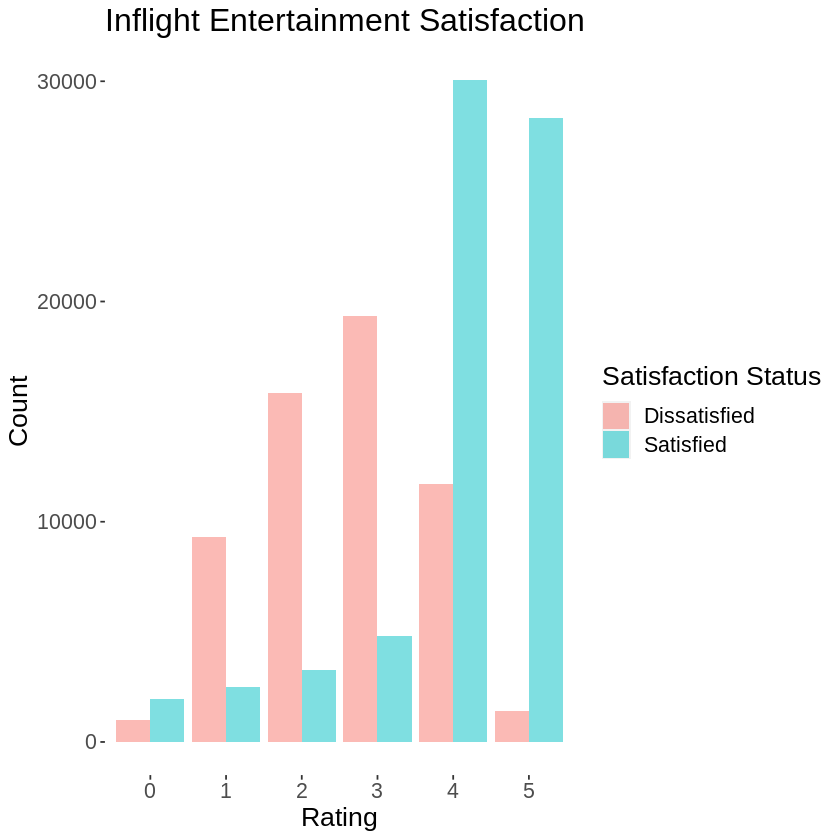

In [34]:
ggplot(cust.satisfaction, aes(x=Inflight.entertainment, fill=satisfaction)) +
  geom_bar(position="dodge", alpha=0.5) +
  labs(x="Rating", y="Count", title="Inflight Entertainment Satisfaction") +
  scale_fill_discrete(name="Satisfaction Status", labels=c("Dissatisfied", "Satisfied")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="right", text=element_text(size=16))

round(prop.table(table(cust.satisfaction$Inflight.entertainment, cust.satisfaction$satisfaction)),3)

The variable Inflight.entertainment showcases a pattern of customer satisfaction and dissatisfaction that aligns with trends observed in other service-related variables. Dissatisfaction with inflight entertainment starts at a minimal 0.8% at score 0, escalates to its highest at 14.9% by score 3, and then significantly reduces to 1.1% at the highest rating of score 5. In contrast, the journey of satisfaction levels through the scores begins modestly, with a gradual increase from 1.5% at score 0 to 3.7% at score 3, reflecting a slow yet steady growth. However, this growth transforms dramatically at the upper end of the scoring range, with satisfaction surging to 23.2% at score 4 and slightly decreasing to 21.9% at score 5, showcasing an exponential increase. This trend underscores the pivotal role of inflight entertainment in enhancing passenger experience, highlighting the importance of significant improvements in this area to boost overall customer satisfaction. The sharp increase in satisfaction at higher scores indicates that customers place a high value on the quality of inflight entertainment.

   
    Dissatisfied Satisfied
  0        0.000     0.000
  1        0.084     0.020
  2        0.110     0.044
  3        0.111     0.062
  4        0.087     0.221
  5        0.062     0.201

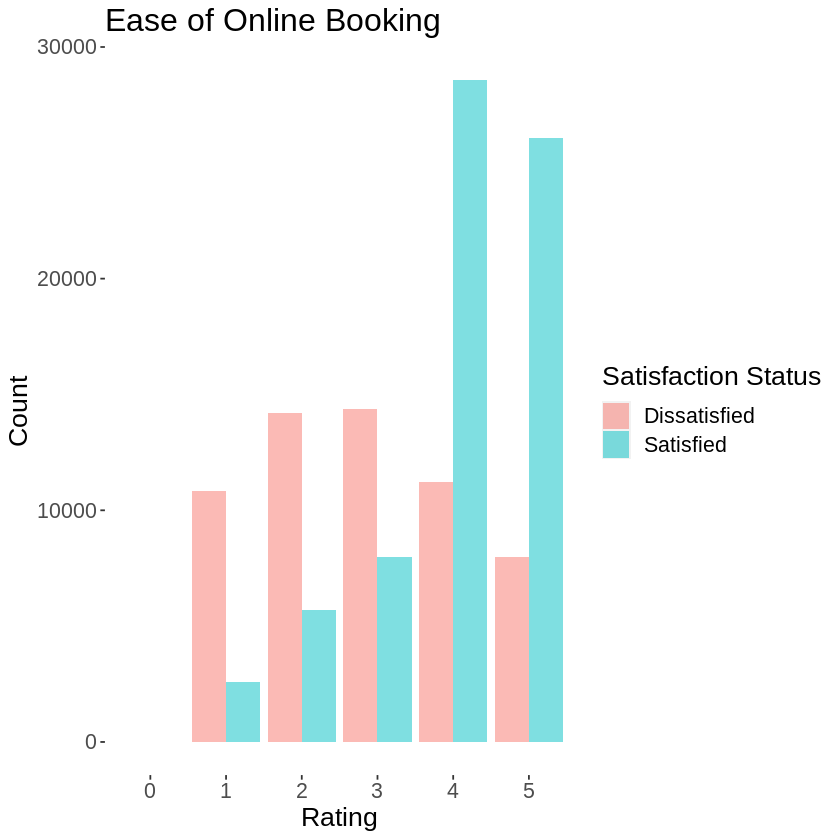

In [35]:
ggplot(cust.satisfaction, aes(x=`Ease.of.Online.booking`, fill=`satisfaction`)) +
  geom_bar(position="dodge", alpha=0.5) +
  labs(x="Rating", y="Count", title="Ease of Online Booking") +
  scale_fill_discrete(name="Satisfaction Status", labels=c("Dissatisfied", "Satisfied")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="right", text=element_text(size=16))
round(prop.table(table(cust.satisfaction$Ease.of.Online.booking, cust.satisfaction$satisfaction)),3)

The variable Ease.of.Online.booking exhibits a pattern of customer satisfaction and dissatisfaction that is consistent with the trends observed in previously discussed variables. Dissatisfaction with online booking begins at 0% for the lowest rating, climbs to a peak of 11.1% at rating 3, and then decreases to 6.2% at the highest rating of 5, illustrating a decrease in discontent as the scores improve. On the satisfaction front, there is a steady growth from rating 0 to 3, culminating in significant satisfaction rates of 22.1% at rating 4 and slightly decreasing to 20.1% at rating 5. This progression underscores the importance of a smooth online booking experience in shaping overall customer satisfaction. The notable increase in satisfaction at the higher ratings highlights the positive impact of enhancements in the online booking process on customer perceptions, reinforcing the value of investing in user-friendly and efficient online services.

   
    Dissatisfied Satisfied
  0        0.000     0.000
  1        0.075     0.027
  2        0.087     0.045
  3        0.123     0.085
  4        0.110     0.203
  5        0.057     0.187

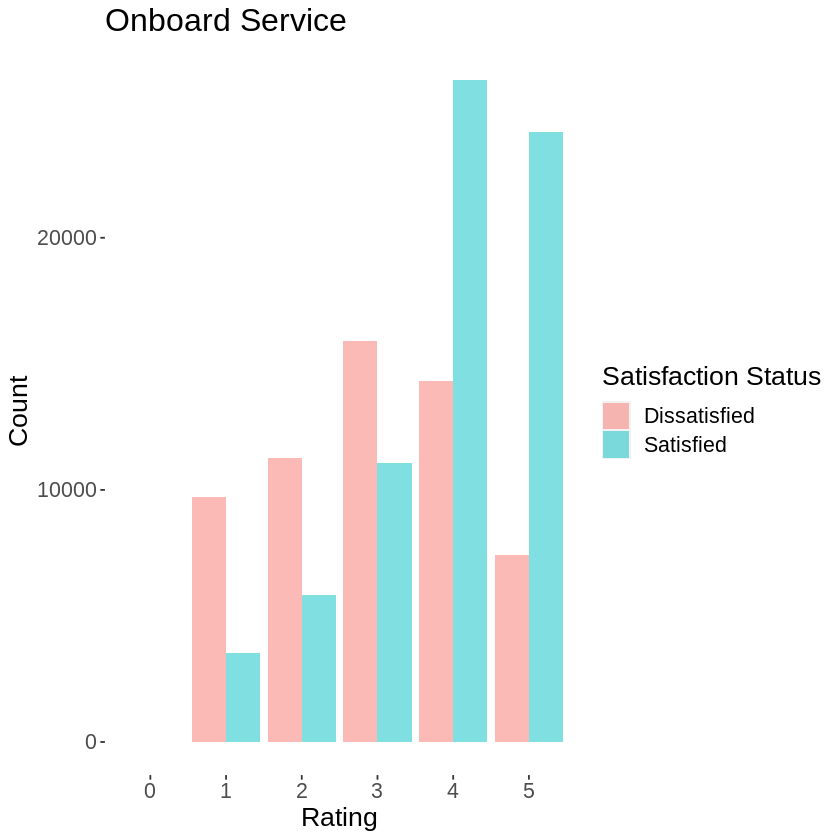

In [36]:
ggplot(cust.satisfaction, aes(x=`On.board.service`, fill =`satisfaction`))+geom_bar(position="dodge", alpha=0.5)+
labs(x="Rating", y="Count", title="Onboard Service")+scale_fill_discrete(name = "Satisfaction Status", labels=c("Dissatisfied", "Satisfied"))+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="right", text= element_text( size = 16))
round(prop.table(table(cust.satisfaction$On.board.service, cust.satisfaction$satisfaction)),3)

The variable On.board.service follows the patterns of dissatisfaction and satisfaction observed in other service-related variables within the dataset. Dissatisfaction with on-board service peaks at 12.3% for customers who rated it a 3, indicating a notable point of discontent among passengers at this level. In terms of satisfaction, there is a consistent increase up to rating 3, after which it experiences a significant jump, reaching 20.3% at rating 4 and slightly decreasing to 18.7% at rating 5. This trend highlights the critical impact that on-board services have on the overall passenger experience, with improvements in this area directly correlating to higher levels of customer satisfaction. The decrease in dissatisfaction alongside the substantial rise in satisfaction at higher ratings underscores the importance of focusing on quality on-board service to enhance customer perceptions and experiences.

   
    Dissatisfied Satisfied
  0        0.001     0.002
  1        0.061     0.024
  2        0.104     0.063
  3        0.109     0.064
  4        0.100     0.206
  5        0.077     0.188

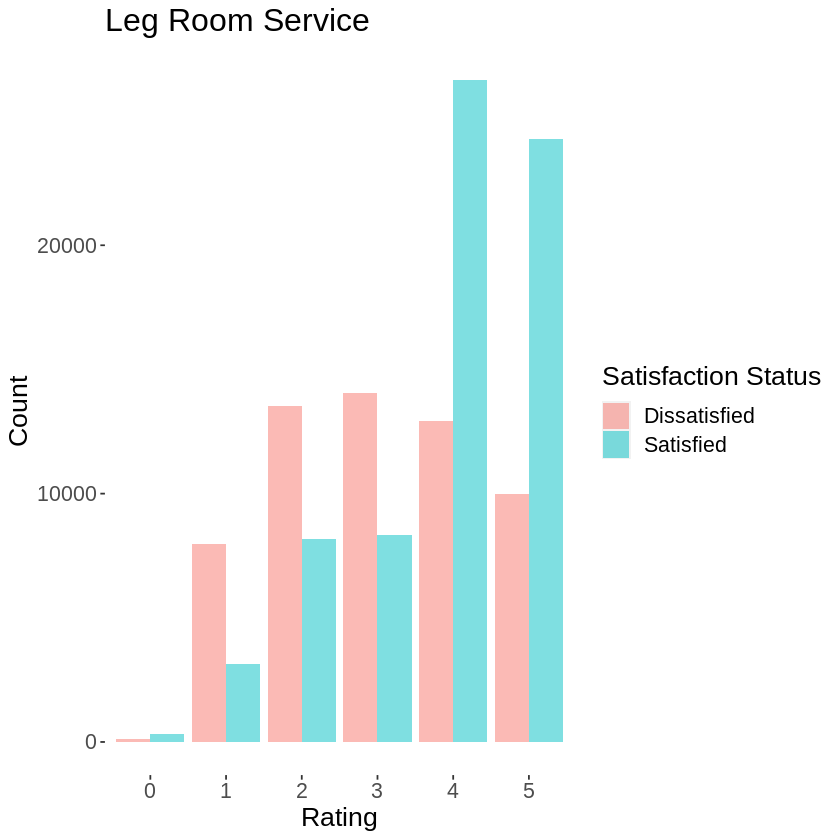

In [37]:
ggplot(cust.satisfaction, aes(x=`Leg.room.service`, fill =`satisfaction`))+geom_bar(position="dodge", alpha=0.5)+
labs(x="Rating", y="Count", title="Leg Room Service")+scale_fill_discrete(name = "Satisfaction Status", labels=c("Dissatisfied", "Satisfied"))+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="right", text= element_text( size = 16))
round(prop.table(table(cust.satisfaction$Leg.room.service, cust.satisfaction$satisfaction)),3)

The variable Leg.room.service mirrors the patterns of dissatisfaction and satisfaction observed in similar service-related variables within the dataset. Dissatisfaction with leg room service culminates at a rating of 3, where 10.9% of passengers express their highest level of discontent. On the satisfaction front, there's a gradual increase in positive responses up to rating 3, followed by a significant surge for ratings 4 and 5, with satisfaction levels reaching 20.6% and 18.8%, respectively. This trend underscores the importance of leg room in passenger comfort and overall satisfaction with the airline service. The exponential increase in satisfaction at higher ratings highlights the critical value passengers place on adequate leg room, suggesting that improvements in this aspect of the service could lead to marked enhancements in customer satisfaction.

   
    Dissatisfied Satisfied
  0        0.000     0.000
  1        0.081     0.037
  2        0.080     0.040
  3        0.118     0.155
  4        0.119     0.162
  5        0.055     0.153

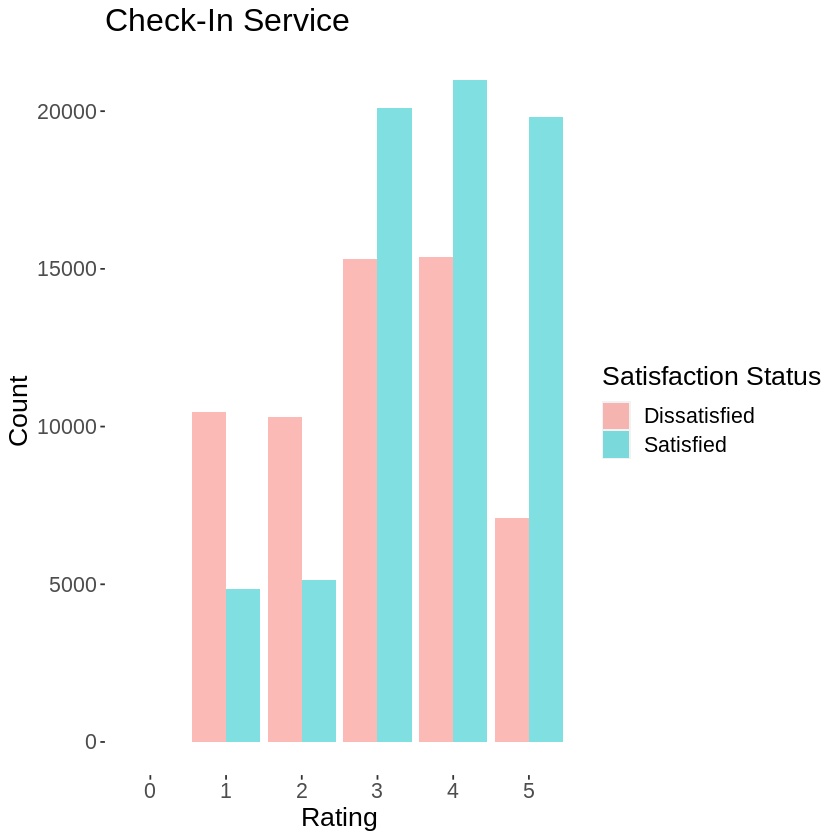

In [38]:
ggplot(cust.satisfaction, aes(x=`Checkin.service`, fill =`satisfaction`))+geom_bar(position="dodge", alpha=0.5)+
labs(x="Rating", y="Count", title="Check-In Service")+
scale_fill_discrete(name = "Satisfaction Status", labels=c("Dissatisfied", "Satisfied"))+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="right", text= element_text( size = 16))
round(prop.table(table(cust.satisfaction$Checkin.service, cust.satisfaction$satisfaction)),3)

The variable Checkin.service exhibits a familiar trend of dissatisfaction and satisfaction as observed in previously analyzed service-related variables. However, it uniquely peaks in dissatisfaction at rating 4, marking a divergence with an 11.9% dissatisfaction rate. Unlike the other variables, satisfaction levels for Checkin.service demonstrate a notably high starting point from rating 3, achieving its zenith at rating 4. The satisfaction rates escalate from 15.5% at rating 3 to 16.2% at rating 4, before slightly declining to 15.3% at rating 5. This pattern emphasizes the critical role of the check-in process in shaping overall passenger satisfaction, suggesting that even slight improvements or declines in service quality at crucial touchpoints can significantly influence customer perceptions and experiences.

In summarizing the analysis across various service-related variables, it becomes evident that customers assigning medium to low ratings, ranging from 0 to 3, are more prone to expressing dissatisfaction. Conversely, as ratings increase to the higher echelons of 4 to 5, a noticeable uptick in satisfaction levels is observed. This trend underscores a clear relationship between service ratings and customer satisfaction, highlighting the importance of striving for excellence in service delivery. Enhancing service attributes that directly impact these ratings can significantly elevate customer satisfaction. Recognizing and addressing the areas that contribute to lower ratings can therefore serve as a strategic focus for improving overall customer experience and loyalty.

## 3. Clusters

**Activity 18 -** To investigate if there are clusters within the dataset, particularly focusing on variables like satisfaction and service ratings, I will be using clustering techniques. One common approach is k-means clustering, which can help identify distinct groups based on similarities in the dataset's features.

Considering the dataset cust.satisfaction encompasses an array of service ratings and satisfaction levels, implementing k-means clustering emerges as a strategic approach to dissect and understand the underlying patterns within this subset. K-means clustering, by its nature, necessitates numerical data for its operation, thereby mandating the conversion of all pertinent variables into numeric form. This is especially critical for variables derived from Likert scale ratings, which are typically stored as factors. By transforming these factors into numeric values, we enable a precise and meaningful application of k-means clustering. This methodological step not only prepares the dataset for advanced analysis but also sets the stage for uncovering distinct clusters within the data, potentially revealing insights into customer satisfaction and service evaluation trends.

In [39]:
library(factoextra)
library(cluster)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



1. We need to ensure all variables used in clustering are numeric. For simplicity, I'll assume var.likertsatisfaction contains only the variables to be included in the clustering and that they're already in a suitable numeric format. If not, let's convert factor ratings to numeric.

In [40]:
cust.satisfaction$Seat.comfort <- as.numeric(as.character(cust.satisfaction$Seat.comfort))

2. Let's determine the number of clusters, k. This often requires some experimentation or methods like the elbow method to identify a suitable k value.

In [41]:
set.seed(123)
clusters <- kmeans(cust.satisfaction[, -which(names(cust.satisfaction) == "satisfaction")], centers=3)

In [42]:
cust.satisfaction$cluster <- as.factor(clusters$cluster)

table(cust.satisfaction$cluster)


    1     2     3 
37333 47782 44372 

3. Let's address the non-numeric columns by either converting them to numeric where appropriate or excluding them from the PCA analysis.

In [43]:
non_numeric_columns <- sapply(cust.satisfaction, function(x) !is.numeric(x))
non_numeric_column_names <- names(cust.satisfaction)[non_numeric_columns]

print(non_numeric_column_names)

[1] "satisfaction"                      "Departure.Arrival.time.convenient"
[3] "Food.and.drink"                    "Inflight.entertainment"           
[5] "Ease.of.Online.booking"            "On.board.service"                 
[7] "Leg.room.service"                  "Checkin.service"                  
[9] "cluster"                          


4. For columns that should be numeric, convert them to numeric if they're currently factors or characters

In [44]:
for(column_name in non_numeric_column_names) {

  if(is.factor(cust.satisfaction[[column_name]]) || is.character(cust.satisfaction[[column_name]])) {
    
    cust.satisfaction[[column_name]] <- as.numeric(as.character(cust.satisfaction[[column_name]]))
  }
}

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


5. Before proceeding with PCA, I'll need to identify columns with constant values and exclude them from the analysis.

In [45]:
constant_columns <- sapply(cust.satisfaction, function(x) length(unique(x)) == 1)

constant_column_names <- names(constant_columns[constant_columns])

if(length(constant_column_names) > 0) {
  print(paste("Constant columns found and will be excluded:", paste(constant_column_names, collapse=", ")))
} else {
  print("No constant columns found.")
}

cust.satisfaction <- cust.satisfaction[, !constant_columns]

[1] "Constant columns found and will be excluded: satisfaction"


This approach first removes any columns with constant values that are incompatible with PCA's requirements and then performs PCA on the cleaned dataset. It was crucial for me to review the constant columns before excluding them to ensure that no critical information was lost inadvertently. PCA and clustering are exploratory tools, and their results should be interpreted within the context of your overall analysis and domain knowledge.

**Activity 19 -** Perform a Principal Component Analysis (PCA) on the dataset, to visualize the results using a scatter plot to display clusters among the observations. We know visualizing high-dimensional data directly is challenging, but using Principal Component Analysis (PCA) method can reduce dimensions and plot the clusters.

,PC1,PC2,cluster
,<dbl>,<dbl>,<fct>
1,-2.729247,1.983202,3
2,-2.532050,2.584009,3
3,-3.596806,2.433553,3
4,-4.085345,1.183879,3
5,-3.791195,1.593620,3
6,-2.577258,3.063278,3


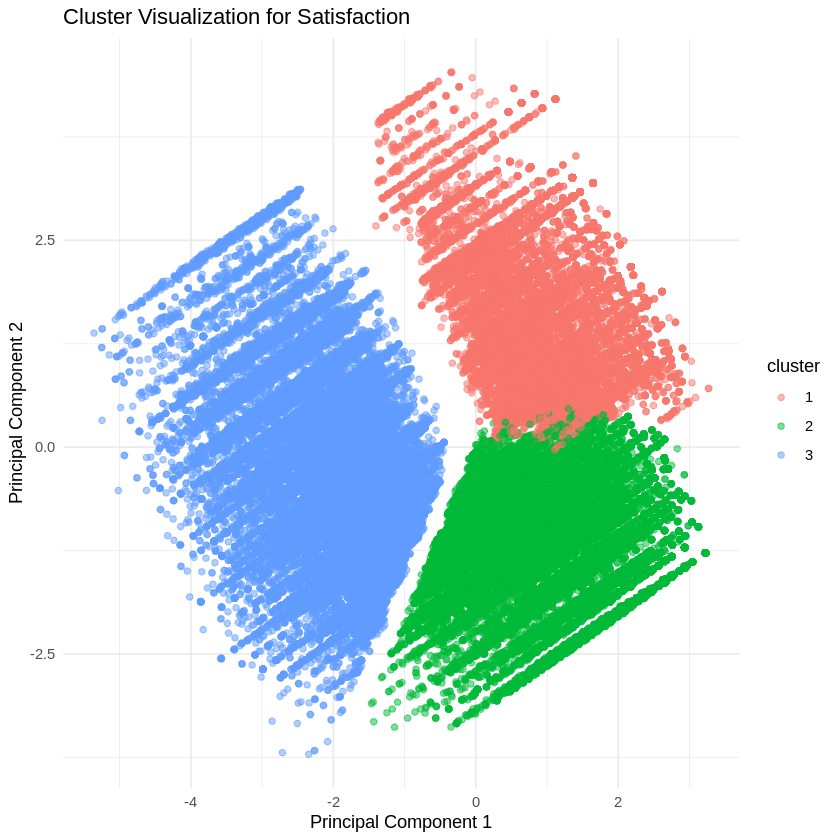

In [46]:
pca <- prcomp(cust.satisfaction, scale. = TRUE)

plot_df <- data.frame(pca$x[, 1:2])
plot_df$cluster <- as.factor(cust.satisfaction$cluster)
head(plot_df)

ggplot(plot_df, aes(x=PC1, y=PC2, color=cluster)) +
  geom_point(alpha=0.5) +
  labs(title="Cluster Visualization for Satisfaction", x="Principal Component 1", y="Principal Component 2") +
  theme_minimal()

The cluster analysis above utilizes Principal Component Analysis (PCA) on a pre-processed dataset to reduce its dimensions. It then projects the observations onto a new space defined by the first two principal components. This step is followed by visualizing the data points, with an emphasis on the clusters to which they belong. The primary goal of this visualization is to uncover and display any inherent patterns or groupings within the customer satisfaction data. By focusing on reduced dimensions that encapsulate the greatest variance, it facilitates a clearer understanding of the dataset's underlying structure.

### Random Forest

**Activity 20 -** We're going to run the code below to split the airlines_flight dataset into training and test sets based on the satisfaction column, with a split ratio of 0.7. This means 70% of the dataset will be used for training, and the remaining 30% will be used for testing. The set.seed(100) function ensures that the results are reproducible, meaning we'll get the same split each time you run this code.

In [47]:
library(caTools)
set.seed(100)
split = sample.split(airlines_flight$satisfaction, SplitRatio = 0.7)

airlines_flight_train = subset(airlines_flight, split == TRUE)
airlines_flight_test = subset(airlines_flight, split == FALSE)

We tried to run the code above but have run into an issue where the dataset is too large for the jupyter environment, so we will subsample the dataset below.

Since the dataset is too large, let's reduce the Dataset Size.

In [48]:
set.seed(100)
airlines_flight_train_small <- airlines_flight_train[sample(nrow(airlines_flight_train), 5000), ]
airlines_flight_test_small <- airlines_flight_test[sample(nrow(airlines_flight_test), 5000), ]

RandomForest_fit <- randomForest(satisfaction ~ Gender + Customer.Type + Type.of.Travel + Class,
                                 data=airlines_flight_train_small, importance=TRUE)
RandomForest_fit


Call:
 randomForest(formula = satisfaction ~ Gender + Customer.Type +      Type.of.Travel + Class, data = airlines_flight_train_small,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 22.54%
Confusion matrix:
             Dissatisfied Satisfied class.error
Dissatisfied         1651       614   0.2710817
Satisfied             513      2222   0.1875686

This code specifies the formula for the Random Forest model where satisfaction is the dependent variable and several others are predictors. The model is trained on the airlines_flight_train dataset, and setting importance=TRUE means we're asking for the importance of each variable to be measured, which can provide insights into which factors are most influential in predicting customer satisfaction.

**Activity 21 -** Plot the random forest fit

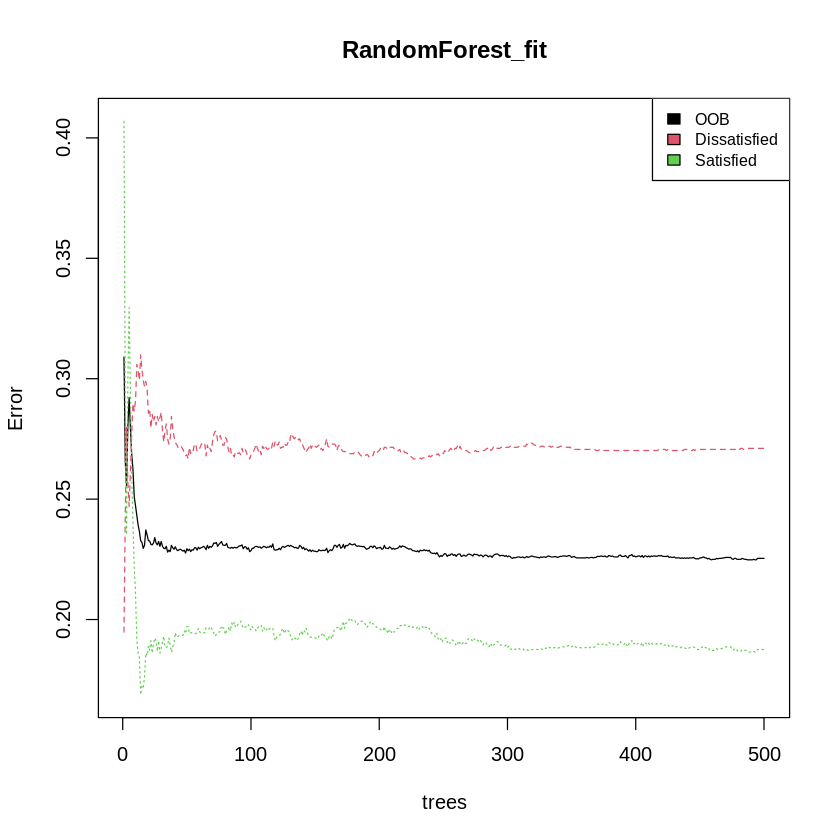

In [49]:
plot(RandomForest_fit)

if ("randomForest" %in% class(RandomForest_fit) && "err.rate" %in% names(RandomForest_fit)) {
    if (ncol(RandomForest_fit$err.rate) > 1) {

        legendLabels <- colnames(RandomForest_fit$err.rate)
        legendColors <- 1:ncol(RandomForest_fit$err.rate)
    } else {

        legendLabels <- "OOB Error Rate"
        legendColors <- 1
    }
   
    legend("topright", legend = legendLabels, col = legendColors, cex = 0.8, fill = legendColors)
} else {
    message("Unable to add legend: Check if RandomForest_fit contains 'err.rate' for a classification task.")
}


The plot shows the error rate of the model as more trees are added to the forest. The specific contents of the plot can vary depending on whether the model is used for classification or regression tasks.

**Activity 22 -** After fitting the model, we can inspect the model object RandomForest_fit to see the results of the training, including the variable importance scores and model performance metrics. We can also use the model to make predictions on new data and evaluate its performance.

In [50]:
predictions <- predict(RandomForest_fit, newdata=airlines_flight_train)

confusionMatrix <- table(predictions, airlines_flight_train$satisfaction)
print(confusionMatrix)

accuracy <- sum(diag(confusionMatrix)) / sum(confusionMatrix)
print(paste("Accuracy:", accuracy))

              
predictions    Dissatisfied Satisfied
  Dissatisfied        29442      9295
  Satisfied           11582     40322
[1] "Accuracy: 0.76967376794166"


In [51]:
predictions <- predict(RandomForest_fit, newdata=airlines_flight_test)

confusionMatrix <- table(predictions, airlines_flight_test$satisfaction)
print(confusionMatrix)

accuracy <- sum(diag(confusionMatrix)) / sum(confusionMatrix)
print(paste("Accuracy:", accuracy))

              
predictions    Dissatisfied Satisfied
  Dissatisfied        12681      4016
  Satisfied            4900     17249
[1] "Accuracy: 0.770478298923956"


The code above is a typical workflow for assessing the performance of a classification model in a supervised learning context. The confusion matrix offers a detailed view of the model's predictive capabilities across different classes, while the accuracy metric provides a quick summary of its overall effectiveness.

**Activity 24 -** perform an evaluation of the Random Forest model's performance on the training data (airlines_flight_train) by generating and visualizing a Receiver Operating Characteristic (ROC) curve and calculating the Area Under the Curve (AUC) value.

In [52]:
prediction_train <- predict(RandomForest_fit, newdata=airlines_flight_train, type = "prob")

satisfaction_train <- prediction_train[,2]

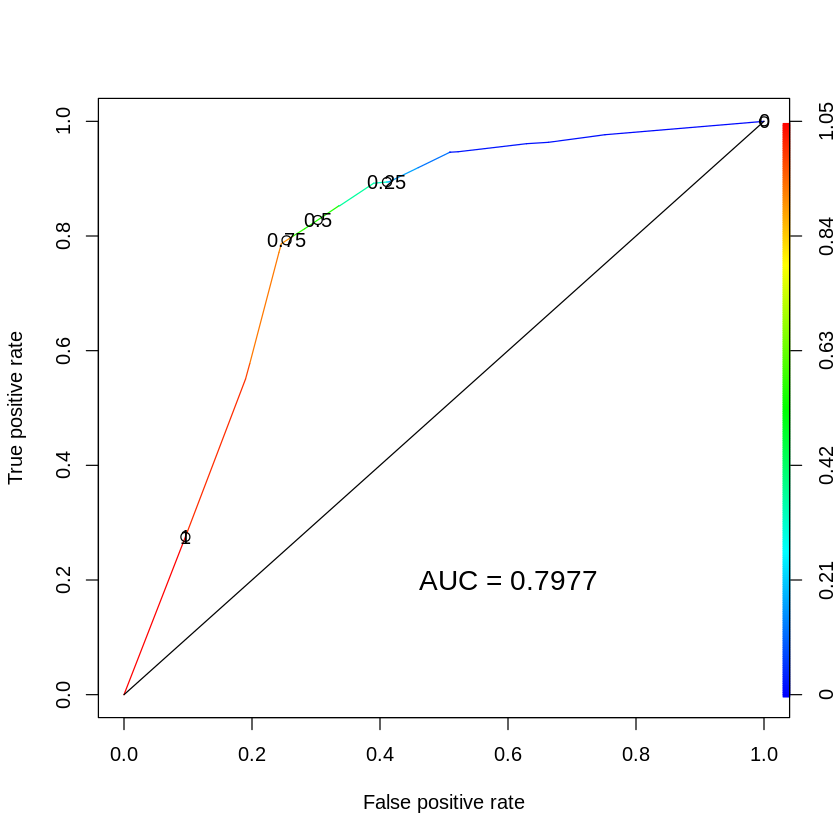

In [53]:
pred_train <- prediction(satisfaction_train, airlines_flight_train$satisfaction)
perf <- performance(pred_train, "tpr", "fpr")

auc <- performance(pred_train, measure = "auc")
auc_value <- auc@y.values[[1]]

plot(perf, colorize = TRUE, print.cutoffs.at = seq(0, 1, by = 0.25))
lines(c(0,1), c(0,1))
text(0.6, 0.2, paste("AUC = ", round(auc_value, 4), sep=""), cex = 1.4)

There we assess how well the Random Forest model distinguishes between satisfied and dissatisfied customers in the training set by plotting an ROC curve and calculating the AUC. A higher AUC value indicates better model performance, with 1.0 being perfect prediction and 0.5 representing a no-skill classifier.

**Activity 25 -** Let's do the same for the test set.

In [54]:
prediction_test <- predict(RandomForest_fit, newdata=airlines_flight_test, type = "prob")

satisfaction_test <- prediction_test[,2]

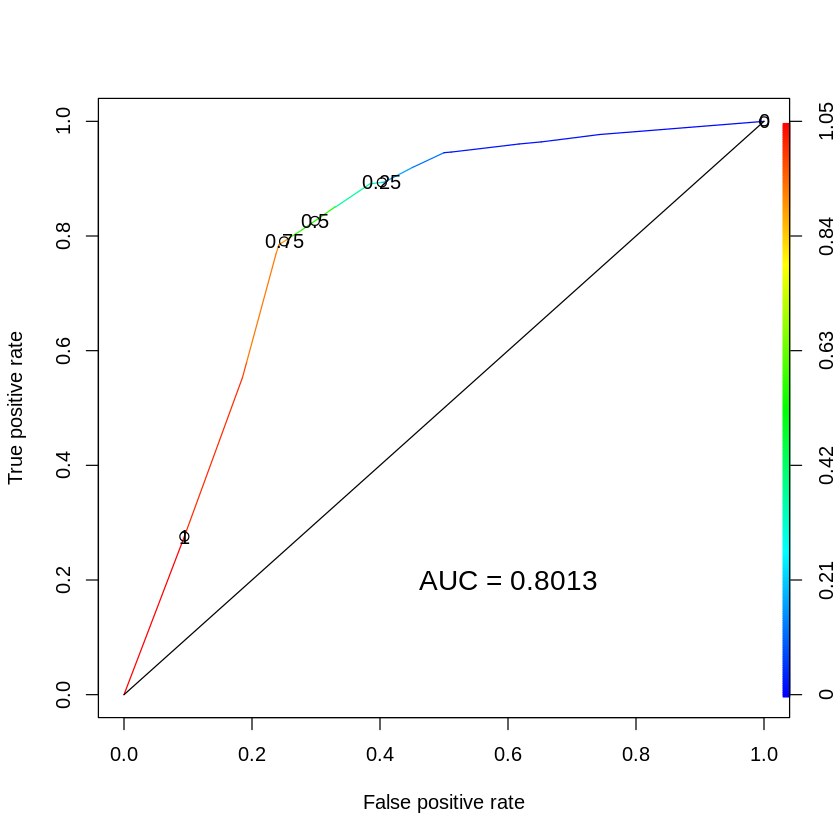

In [55]:
pred_test <- prediction(satisfaction_test, airlines_flight_test$satisfaction)
perf <- performance(pred_test, "tpr", "fpr")

auc <- performance(pred_test, measure = "auc")
auc_value <- auc@y.values[[1]]

plot(perf, colorize = TRUE, print.cutoffs.at = seq(0, 1, by = 0.25))
lines(c(0,1), c(0,1))
text(0.6, 0.2, paste("AUC = ", round(auc_value, 4), sep=""), cex = 1.4)

The effectiveness and precision of the logistic regression model were assessed through the creation of a confusion matrix, marking a significant step in evaluating the model's performance. Utilizing the predict() function, predictions were derived from the logistic regression model, which were then categorized into binary responses based on a satisfaction probability threshold of 50%, identifying predictions as either satisfied (1) or dissatisfied (0). This categorization was pivotal for constructing the confusion matrix, allowing for a comprehensive evaluation of the model's predictive accuracy. 

The confusion matrix unveiled an 83% accuracy rate for the logistic regression model, indicating a substantial level of reliability in predicting customer satisfaction outcomes. This high degree of accuracy underscores the model's utility in identifying key factors that influence customer satisfaction, providing a solid foundation for strategic improvements.

In response to the insights gained, the airline identified several potential strategies to enhance customer satisfaction. Elevating the onboard dining experience through partnerships with reputable suppliers ensures a variety of high-quality, dietary-specific food and drink options. Enhancing customer service by increasing staff numbers both on the ground and in-flight guarantees prompt and attentive service. Upgrading onboard entertainment with a diverse selection of movies, TV shows, and games caters to the preferences of all passengers. Improving seating comfort by increasing legroom and introducing reclining seats aims to enhance overall passenger comfort.

These targeted initiatives, informed by the logistic regression analysis and the confusion matrix's insights, present a proactive approach to elevating service quality and aligning more closely with customer expectations. The strategic focus on onboard dining, customer service, entertainment, and seating comfort is predicated on their significant impact on customer satisfaction, as revealed by the analysis.

The comprehensive evaluation process, from logistic regression analysis to the application of a confusion matrix, not only gauged the model's predictive power but also illuminated areas for strategic enhancement. This holistic approach enables the airline to prioritize customer satisfaction, leveraging data-driven insights to implement improvements. Ultimately, the findings from this analysis serve as a valuable guide for refining the airline's approach to service delivery, aiming for a superior customer experience that fosters loyalty and satisfaction.

This methodological rigor and strategic application of analysis findings illustrate a commendable commitment to continuous improvement and customer-centric service delivery, setting a precedent for informed decision-making in the airline industry.